# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 37155 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 37155) |          | Elapsed Time: 0:00:24 ETA:  10 days, 14:21:39

  0% (   84 of 37155) |                    | Elapsed Time: 0:00:25 ETA:  0:07:06

  0% (  160 of 37155) |                    | Elapsed Time: 0:00:26 ETA:  0:07:24

  0% (  237 of 37155) |                    | Elapsed Time: 0:00:27 ETA:  0:07:27

  0% (  314 of 37155) |                    | Elapsed Time: 0:00:28 ETA:  0:07:29

  1% (  392 of 37155) |                    | Elapsed Time: 0:00:29 ETA:  0:07:28

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:30 ETA:  0:07:27

  1% (  499 of 37155) |                    | Elapsed Time: 0:00:31 ETA:  0:08:18

  1% (  579 of 37155) |                    | Elapsed Time: 0:00:32 ETA:  0:08:09

  1% (  659 of 37155) |                    | Elapsed Time: 0:00:33 ETA:  0:08:01

  1% (  742 of 37155) |                    | Elapsed Time: 0:00:34 ETA:  0:08:00

  2% (  826 of 37155) |                    | Elapsed Time: 0:00:35 ETA:  0:07:53

  2% (  907 of 37155) |                    | Elapsed Time: 0:00:36 ETA:  0:07:49

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:37 ETA:  0:07:51

  2% ( 1008 of 37155) |                    | Elapsed Time: 0:00:38 ETA:  0:07:49

  2% ( 1090 of 37155) |                    | Elapsed Time: 0:00:39 ETA:  0:07:45

  3% ( 1176 of 37155) |                    | Elapsed Time: 0:00:40 ETA:  0:06:57

  3% ( 1260 of 37155) |                    | Elapsed Time: 0:00:41 ETA:  0:06:54

  3% ( 1343 of 37155) |                    | Elapsed Time: 0:00:42 ETA:  0:06:51

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:42 ETA:  0:06:50

  3% ( 1464 of 37155) |                    | Elapsed Time: 0:00:43 ETA:  0:06:59

  4% ( 1533 of 37155) |                    | Elapsed Time: 0:00:44 ETA:  0:07:08

  4% ( 1602 of 37155) |                    | Elapsed Time: 0:00:45 ETA:  0:07:13

  4% ( 1671 of 37155) |                    | Elapsed Time: 0:00:46 ETA:  0:07:20

  4% ( 1737 of 37155) |                    | Elapsed Time: 0:00:47 ETA:  0:07:31

  4% ( 1806 of 37155) |                    | Elapsed Time: 0:00:48 ETA:  0:07:43

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:00:49 ETA:  0:07:57

  5% ( 1936 of 37155) |#                   | Elapsed Time: 0:00:50 ETA:  0:08:00

  5% ( 2012 of 37155) |#                   | Elapsed Time: 0:00:51 ETA:  0:08:01

  5% ( 2092 of 37155) |#                   | Elapsed Time: 0:00:52 ETA:  0:07:51

  5% ( 2170 of 37155) |#                   | Elapsed Time: 0:00:53 ETA:  0:07:42

  6% ( 2252 of 37155) |#                   | Elapsed Time: 0:00:54 ETA:  0:07:31

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:00:55 ETA:  0:07:16

  6% ( 2412 of 37155) |#                   | Elapsed Time: 0:00:56 ETA:  0:06:58

  6% ( 2500 of 37155) |#                   | Elapsed Time: 0:00:57 ETA:  0:06:45

  6% ( 2587 of 37155) |#                   | Elapsed Time: 0:00:58 ETA:  0:06:32

  7% ( 2678 of 37155) |#                   | Elapsed Time: 0:00:59 ETA:  0:06:23

  7% ( 2768 of 37155) |#                   | Elapsed Time: 0:01:00 ETA:  0:06:14

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:01:00 ETA:  0:06:10

  7% ( 2878 of 37155) |#                   | Elapsed Time: 0:01:01 ETA:  0:06:01

  7% ( 2960 of 37155) |#                   | Elapsed Time: 0:01:02 ETA:  0:06:00

  8% ( 3042 of 37155) |#                   | Elapsed Time: 0:01:03 ETA:  0:06:04

  8% ( 3126 of 37155) |#                   | Elapsed Time: 0:01:04 ETA:  0:06:05

  8% ( 3211 of 37155) |#                   | Elapsed Time: 0:01:05 ETA:  0:06:06

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:01:06 ETA:  0:06:07

  8% ( 3338 of 37155) |#                   | Elapsed Time: 0:01:07 ETA:  0:06:09

  9% ( 3415 of 37155) |#                   | Elapsed Time: 0:01:08 ETA:  0:06:17

  9% ( 3484 of 37155) |#                   | Elapsed Time: 0:01:09 ETA:  0:06:26

  9% ( 3499 of 37155) |#                   | Elapsed Time: 0:01:10 ETA:  0:07:28

  9% ( 3571 of 37155) |#                   | Elapsed Time: 0:01:11 ETA:  0:07:35

  9% ( 3637 of 37155) |#                   | Elapsed Time: 0:01:12 ETA:  0:07:48

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:01:13 ETA:  0:08:14

 10% ( 3808 of 37155) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:54

 10% ( 3890 of 37155) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:57

 10% ( 3966 of 37155) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:57

 10% ( 4042 of 37155) |##                  | Elapsed Time: 0:01:17 ETA:  0:07:50

 11% ( 4121 of 37155) |##                  | Elapsed Time: 0:01:18 ETA:  0:06:45

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:01:19 ETA:  0:06:39

 11% ( 4262 of 37155) |##                  | Elapsed Time: 0:01:20 ETA:  0:06:26

 11% ( 4340 of 37155) |##                  | Elapsed Time: 0:01:21 ETA:  0:06:23

 11% ( 4421 of 37155) |##                  | Elapsed Time: 0:01:22 ETA:  0:06:22

 12% ( 4499 of 37155) |##                  | Elapsed Time: 0:01:23 ETA:  0:06:30

 12% ( 4578 of 37155) |##                  | Elapsed Time: 0:01:24 ETA:  0:06:31

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:01:25 ETA:  0:06:27

 12% ( 4723 of 37155) |##                  | Elapsed Time: 0:01:26 ETA:  0:06:24

 12% ( 4801 of 37155) |##                  | Elapsed Time: 0:01:27 ETA:  0:06:24

 13% ( 4882 of 37155) |##                  | Elapsed Time: 0:01:28 ETA:  0:06:22

 13% ( 4963 of 37155) |##                  | Elapsed Time: 0:01:29 ETA:  0:06:22

 13% ( 5043 of 37155) |##                  | Elapsed Time: 0:01:30 ETA:  0:06:19

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:01:30 ETA:  0:06:20

 13% ( 5186 of 37155) |##                  | Elapsed Time: 0:01:31 ETA:  0:06:20

 14% ( 5266 of 37155) |##                  | Elapsed Time: 0:01:32 ETA:  0:06:18

 14% ( 5345 of 37155) |##                  | Elapsed Time: 0:01:33 ETA:  0:06:18

 14% ( 5423 of 37155) |##                  | Elapsed Time: 0:01:34 ETA:  0:06:16

 14% ( 5502 of 37155) |##                  | Elapsed Time: 0:01:35 ETA:  0:06:15

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:01:36 ETA:  0:06:16

 15% ( 5653 of 37155) |###                 | Elapsed Time: 0:01:37 ETA:  0:06:16

 15% ( 5733 of 37155) |###                 | Elapsed Time: 0:01:38 ETA:  0:06:15

 15% ( 5810 of 37155) |###                 | Elapsed Time: 0:01:39 ETA:  0:06:15

 15% ( 5888 of 37155) |###                 | Elapsed Time: 0:01:40 ETA:  0:06:13

 16% ( 5967 of 37155) |###                 | Elapsed Time: 0:01:41 ETA:  0:06:13

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:01:42 ETA:  0:06:13

 16% ( 6116 of 37155) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:12

 16% ( 6196 of 37155) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:10

 16% ( 6280 of 37155) |###                 | Elapsed Time: 0:01:45 ETA:  0:06:05

 17% ( 6364 of 37155) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:01

 17% ( 6449 of 37155) |###                 | Elapsed Time: 0:01:47 ETA:  0:05:58

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:01:48 ETA:  0:05:56

 17% ( 6583 of 37155) |###                 | Elapsed Time: 0:01:49 ETA:  0:05:54

 17% ( 6662 of 37155) |###                 | Elapsed Time: 0:01:50 ETA:  0:05:53

 18% ( 6742 of 37155) |###                 | Elapsed Time: 0:01:51 ETA:  0:05:51

 18% ( 6823 of 37155) |###                 | Elapsed Time: 0:01:52 ETA:  0:05:48

 18% ( 6903 of 37155) |###                 | Elapsed Time: 0:01:53 ETA:  0:05:47

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:01:54 ETA:  0:05:47

 18% ( 7052 of 37155) |###                 | Elapsed Time: 0:01:55 ETA:  0:05:46

 19% ( 7135 of 37155) |###                 | Elapsed Time: 0:01:56 ETA:  0:05:45

 19% ( 7217 of 37155) |###                 | Elapsed Time: 0:01:57 ETA:  0:05:42

 19% ( 7241 of 37155) |###                 | Elapsed Time: 0:01:58 ETA:  0:06:44

 19% ( 7313 of 37155) |###                 | Elapsed Time: 0:01:59 ETA:  0:06:49

 19% ( 7393 of 37155) |###                 | Elapsed Time: 0:02:00 ETA:  0:06:48

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:02:01 ETA:  0:06:51

 20% ( 7514 of 37155) |####                | Elapsed Time: 0:02:02 ETA:  0:06:48

 20% ( 7598 of 37155) |####                | Elapsed Time: 0:02:03 ETA:  0:06:43

 20% ( 7682 of 37155) |####                | Elapsed Time: 0:02:04 ETA:  0:06:43

 20% ( 7767 of 37155) |####                | Elapsed Time: 0:02:05 ETA:  0:06:40

 21% ( 7852 of 37155) |####                | Elapsed Time: 0:02:06 ETA:  0:06:37

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:02:06 ETA:  0:05:28

 21% ( 7979 of 37155) |####                | Elapsed Time: 0:02:07 ETA:  0:05:19

 21% ( 8063 of 37155) |####                | Elapsed Time: 0:02:08 ETA:  0:05:16

 21% ( 8147 of 37155) |####                | Elapsed Time: 0:02:09 ETA:  0:05:14

 22% ( 8231 of 37155) |####                | Elapsed Time: 0:02:10 ETA:  0:05:12

 22% ( 8313 of 37155) |####                | Elapsed Time: 0:02:11 ETA:  0:05:13

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:02:12 ETA:  0:05:12

 22% ( 8445 of 37155) |####                | Elapsed Time: 0:02:13 ETA:  0:05:11

 22% ( 8527 of 37155) |####                | Elapsed Time: 0:02:14 ETA:  0:05:11

 23% ( 8608 of 37155) |####                | Elapsed Time: 0:02:15 ETA:  0:05:13

 23% ( 8686 of 37155) |####                | Elapsed Time: 0:02:16 ETA:  0:05:15

 23% ( 8766 of 37155) |####                | Elapsed Time: 0:02:17 ETA:  0:05:17

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:02:18 ETA:  0:05:17

 23% ( 8906 of 37155) |####                | Elapsed Time: 0:02:19 ETA:  0:05:19

 24% ( 8986 of 37155) |####                | Elapsed Time: 0:02:20 ETA:  0:05:19

 24% ( 9062 of 37155) |####                | Elapsed Time: 0:02:21 ETA:  0:05:23

 24% ( 9137 of 37155) |####                | Elapsed Time: 0:02:22 ETA:  0:05:29

 24% ( 9211 of 37155) |####                | Elapsed Time: 0:02:23 ETA:  0:05:34

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:02:24 ETA:  0:05:39

 25% ( 9365 of 37155) |#####               | Elapsed Time: 0:02:25 ETA:  0:05:41

 25% ( 9443 of 37155) |#####               | Elapsed Time: 0:02:26 ETA:  0:05:42

 25% ( 9518 of 37155) |#####               | Elapsed Time: 0:02:27 ETA:  0:05:45

 25% ( 9594 of 37155) |#####               | Elapsed Time: 0:02:28 ETA:  0:05:48

 26% ( 9671 of 37155) |#####               | Elapsed Time: 0:02:29 ETA:  0:05:46

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:40

 26% ( 9831 of 37155) |#####               | Elapsed Time: 0:02:31 ETA:  0:05:36

 26% ( 9910 of 37155) |#####               | Elapsed Time: 0:02:32 ETA:  0:05:33

 26% ( 9996 of 37155) |#####               | Elapsed Time: 0:02:33 ETA:  0:05:24

 27% (10081 of 37155) |#####               | Elapsed Time: 0:02:34 ETA:  0:05:18

 27% (10164 of 37155) |#####               | Elapsed Time: 0:02:35 ETA:  0:05:11

 27% (10218 of 37155) |#####               | Elapsed Time: 0:02:36 ETA:  0:05:06

 27% (10302 of 37155) |#####               | Elapsed Time: 0:02:37 ETA:  0:05:00

 27% (10385 of 37155) |#####               | Elapsed Time: 0:02:38 ETA:  0:04:55

 28% (10467 of 37155) |#####               | Elapsed Time: 0:02:39 ETA:  0:04:54

 28% (10544 of 37155) |#####               | Elapsed Time: 0:02:40 ETA:  0:04:53

 28% (10620 of 37155) |#####               | Elapsed Time: 0:02:41 ETA:  0:04:53

 28% (10683 of 37155) |#####               | Elapsed Time: 0:02:41 ETA:  0:04:55

 28% (10766 of 37155) |#####               | Elapsed Time: 0:02:42 ETA:  0:04:55

 29% (10838 of 37155) |#####               | Elapsed Time: 0:02:43 ETA:  0:05:02

 29% (10917 of 37155) |#####               | Elapsed Time: 0:02:44 ETA:  0:05:03

 29% (10994 of 37155) |#####               | Elapsed Time: 0:02:45 ETA:  0:05:06

 29% (11068 of 37155) |#####               | Elapsed Time: 0:02:46 ETA:  0:05:13

 30% (11147 of 37155) |######              | Elapsed Time: 0:02:47 ETA:  0:05:13

 30% (11223 of 37155) |######              | Elapsed Time: 0:02:48 ETA:  0:05:13

 30% (11304 of 37155) |######              | Elapsed Time: 0:02:49 ETA:  0:05:09

 30% (11382 of 37155) |######              | Elapsed Time: 0:02:51 ETA:  0:05:09

 30% (11468 of 37155) |######              | Elapsed Time: 0:02:52 ETA:  0:05:07

 31% (11556 of 37155) |######              | Elapsed Time: 0:02:53 ETA:  0:04:55

 31% (11611 of 37155) |######              | Elapsed Time: 0:02:53 ETA:  0:04:51

 31% (11698 of 37155) |######              | Elapsed Time: 0:02:54 ETA:  0:04:43

 31% (11787 of 37155) |######              | Elapsed Time: 0:02:55 ETA:  0:04:32

 31% (11871 of 37155) |######              | Elapsed Time: 0:02:58 ETA:  0:05:39

 32% (11954 of 37155) |######              | Elapsed Time: 0:02:59 ETA:  0:05:33

 32% (12033 of 37155) |######              | Elapsed Time: 0:03:00 ETA:  0:05:33

 32% (12076 of 37155) |######              | Elapsed Time: 0:03:00 ETA:  0:05:30

 32% (12159 of 37155) |######              | Elapsed Time: 0:03:01 ETA:  0:05:31

 32% (12232 of 37155) |######              | Elapsed Time: 0:03:02 ETA:  0:05:41

 33% (12313 of 37155) |######              | Elapsed Time: 0:03:03 ETA:  0:05:41

 33% (12390 of 37155) |######              | Elapsed Time: 0:03:04 ETA:  0:05:47

 33% (12473 of 37155) |######              | Elapsed Time: 0:03:05 ETA:  0:05:51

 33% (12540 of 37155) |######              | Elapsed Time: 0:03:06 ETA:  0:04:37

 33% (12621 of 37155) |######              | Elapsed Time: 0:03:07 ETA:  0:04:37

 34% (12699 of 37155) |######              | Elapsed Time: 0:03:08 ETA:  0:04:37

 34% (12786 of 37155) |######              | Elapsed Time: 0:03:09 ETA:  0:04:35

 34% (12872 of 37155) |######              | Elapsed Time: 0:03:10 ETA:  0:04:32

 34% (12956 of 37155) |######              | Elapsed Time: 0:03:11 ETA:  0:04:24

 35% (13005 of 37155) |#######             | Elapsed Time: 0:03:12 ETA:  0:04:24

 35% (13082 of 37155) |#######             | Elapsed Time: 0:03:13 ETA:  0:04:23

 35% (13161 of 37155) |#######             | Elapsed Time: 0:03:14 ETA:  0:04:24

 35% (13239 of 37155) |#######             | Elapsed Time: 0:03:15 ETA:  0:04:25

 35% (13319 of 37155) |#######             | Elapsed Time: 0:03:16 ETA:  0:04:25

 36% (13401 of 37155) |#######             | Elapsed Time: 0:03:17 ETA:  0:04:21

 36% (13469 of 37155) |#######             | Elapsed Time: 0:03:17 ETA:  0:04:26

 36% (13551 of 37155) |#######             | Elapsed Time: 0:03:18 ETA:  0:04:28

 36% (13631 of 37155) |#######             | Elapsed Time: 0:03:19 ETA:  0:04:30

 36% (13714 of 37155) |#######             | Elapsed Time: 0:03:20 ETA:  0:04:27

 37% (13790 of 37155) |#######             | Elapsed Time: 0:03:22 ETA:  0:04:26

 37% (13876 of 37155) |#######             | Elapsed Time: 0:03:23 ETA:  0:04:21

 37% (13934 of 37155) |#######             | Elapsed Time: 0:03:23 ETA:  0:04:17

 37% (14022 of 37155) |#######             | Elapsed Time: 0:03:24 ETA:  0:04:11

 37% (14110 of 37155) |#######             | Elapsed Time: 0:03:25 ETA:  0:04:05

 38% (14193 of 37155) |#######             | Elapsed Time: 0:03:26 ETA:  0:04:02

 38% (14259 of 37155) |#######             | Elapsed Time: 0:03:27 ETA:  0:04:12

 38% (14327 of 37155) |#######             | Elapsed Time: 0:03:28 ETA:  0:04:18

 38% (14398 of 37155) |#######             | Elapsed Time: 0:03:29 ETA:  0:04:21

 38% (14475 of 37155) |#######             | Elapsed Time: 0:03:30 ETA:  0:04:19

 39% (14554 of 37155) |#######             | Elapsed Time: 0:03:31 ETA:  0:04:23

 39% (14626 of 37155) |#######             | Elapsed Time: 0:03:32 ETA:  0:04:29

 39% (14707 of 37155) |#######             | Elapsed Time: 0:03:33 ETA:  0:04:34

 39% (14788 of 37155) |#######             | Elapsed Time: 0:03:34 ETA:  0:04:38

 40% (14862 of 37155) |########            | Elapsed Time: 0:03:35 ETA:  0:04:41

 40% (14939 of 37155) |########            | Elapsed Time: 0:03:36 ETA:  0:04:31

 40% (15019 of 37155) |########            | Elapsed Time: 0:03:37 ETA:  0:04:21

 40% (15102 of 37155) |########            | Elapsed Time: 0:03:38 ETA:  0:04:16

 40% (15183 of 37155) |########            | Elapsed Time: 0:03:39 ETA:  0:04:12

 41% (15265 of 37155) |########            | Elapsed Time: 0:03:40 ETA:  0:04:09

 41% (15327 of 37155) |########            | Elapsed Time: 0:03:41 ETA:  0:04:02

 41% (15411 of 37155) |########            | Elapsed Time: 0:03:42 ETA:  0:03:58

 41% (15491 of 37155) |########            | Elapsed Time: 0:03:43 ETA:  0:03:58

 41% (15567 of 37155) |########            | Elapsed Time: 0:03:44 ETA:  0:03:58

 42% (15640 of 37155) |########            | Elapsed Time: 0:03:45 ETA:  0:04:00

 42% (15719 of 37155) |########            | Elapsed Time: 0:03:46 ETA:  0:04:00

 42% (15791 of 37155) |########            | Elapsed Time: 0:03:47 ETA:  0:04:01

 42% (15874 of 37155) |########            | Elapsed Time: 0:03:48 ETA:  0:03:59

 42% (15957 of 37155) |########            | Elapsed Time: 0:03:49 ETA:  0:03:57

 43% (16039 of 37155) |########            | Elapsed Time: 0:03:50 ETA:  0:03:56

 43% (16121 of 37155) |########            | Elapsed Time: 0:03:51 ETA:  0:03:57

 43% (16205 of 37155) |########            | Elapsed Time: 0:03:52 ETA:  0:03:53

 43% (16256 of 37155) |########            | Elapsed Time: 0:03:53 ETA:  0:03:50

 43% (16336 of 37155) |########            | Elapsed Time: 0:03:54 ETA:  0:03:44

 44% (16416 of 37155) |########            | Elapsed Time: 0:03:55 ETA:  0:03:43

 44% (16496 of 37155) |########            | Elapsed Time: 0:03:56 ETA:  0:03:42

 44% (16576 of 37155) |########            | Elapsed Time: 0:03:57 ETA:  0:03:43

 44% (16656 of 37155) |########            | Elapsed Time: 0:03:58 ETA:  0:03:44

 45% (16720 of 37155) |#########           | Elapsed Time: 0:03:58 ETA:  0:03:43

 45% (16799 of 37155) |#########           | Elapsed Time: 0:03:59 ETA:  0:03:44

 45% (16876 of 37155) |#########           | Elapsed Time: 0:04:00 ETA:  0:03:48

 45% (16956 of 37155) |#########           | Elapsed Time: 0:04:01 ETA:  0:03:46

 45% (17035 of 37155) |#########           | Elapsed Time: 0:04:02 ETA:  0:03:46

 46% (17114 of 37155) |#########           | Elapsed Time: 0:04:03 ETA:  0:03:45

 46% (17185 of 37155) |#########           | Elapsed Time: 0:04:04 ETA:  0:03:42

 46% (17264 of 37155) |#########           | Elapsed Time: 0:04:05 ETA:  0:03:42

 46% (17345 of 37155) |#########           | Elapsed Time: 0:04:06 ETA:  0:03:40

 46% (17426 of 37155) |#########           | Elapsed Time: 0:04:07 ETA:  0:03:40

 47% (17504 of 37155) |#########           | Elapsed Time: 0:04:08 ETA:  0:03:40

 47% (17517 of 37155) |#########           | Elapsed Time: 0:04:10 ETA:  0:05:24

 47% (17592 of 37155) |#########           | Elapsed Time: 0:04:11 ETA:  0:05:28

 47% (17649 of 37155) |#########           | Elapsed Time: 0:04:12 ETA:  0:05:36

 47% (17720 of 37155) |#########           | Elapsed Time: 0:04:13 ETA:  0:05:43

 47% (17793 of 37155) |#########           | Elapsed Time: 0:04:14 ETA:  0:05:49

 48% (17873 of 37155) |#########           | Elapsed Time: 0:04:15 ETA:  0:05:47

 48% (17960 of 37155) |#########           | Elapsed Time: 0:04:16 ETA:  0:05:40

 48% (18042 of 37155) |#########           | Elapsed Time: 0:04:17 ETA:  0:05:38

 48% (18114 of 37155) |#########           | Elapsed Time: 0:04:18 ETA:  0:05:32

 48% (18201 of 37155) |#########           | Elapsed Time: 0:04:19 ETA:  0:03:31

 49% (18290 of 37155) |#########           | Elapsed Time: 0:04:20 ETA:  0:03:20

 49% (18372 of 37155) |#########           | Elapsed Time: 0:04:21 ETA:  0:03:14

 49% (18457 of 37155) |#########           | Elapsed Time: 0:04:22 ETA:  0:03:04

 49% (18534 of 37155) |#########           | Elapsed Time: 0:04:23 ETA:  0:03:01

 50% (18578 of 37155) |##########          | Elapsed Time: 0:04:24 ETA:  0:03:00

 50% (18664 of 37155) |##########          | Elapsed Time: 0:04:25 ETA:  0:02:59

 50% (18749 of 37155) |##########          | Elapsed Time: 0:04:26 ETA:  0:02:57

 50% (18833 of 37155) |##########          | Elapsed Time: 0:04:27 ETA:  0:02:57

 50% (18915 of 37155) |##########          | Elapsed Time: 0:04:28 ETA:  0:02:59

 51% (18990 of 37155) |##########          | Elapsed Time: 0:04:29 ETA:  0:03:07

 51% (19042 of 37155) |##########          | Elapsed Time: 0:04:29 ETA:  0:03:09

 51% (19124 of 37155) |##########          | Elapsed Time: 0:04:30 ETA:  0:03:10

 51% (19202 of 37155) |##########          | Elapsed Time: 0:04:31 ETA:  0:03:09

 51% (19287 of 37155) |##########          | Elapsed Time: 0:04:32 ETA:  0:03:04

 52% (19369 of 37155) |##########          | Elapsed Time: 0:04:33 ETA:  0:03:06

 52% (19458 of 37155) |##########          | Elapsed Time: 0:04:34 ETA:  0:03:02

 52% (19507 of 37155) |##########          | Elapsed Time: 0:04:35 ETA:  0:03:05

 52% (19585 of 37155) |##########          | Elapsed Time: 0:04:36 ETA:  0:03:07

 52% (19662 of 37155) |##########          | Elapsed Time: 0:04:37 ETA:  0:03:04

 53% (19743 of 37155) |##########          | Elapsed Time: 0:04:38 ETA:  0:03:01

 53% (19827 of 37155) |##########          | Elapsed Time: 0:04:39 ETA:  0:02:59

 53% (19911 of 37155) |##########          | Elapsed Time: 0:04:40 ETA:  0:02:54

 53% (19971 of 37155) |##########          | Elapsed Time: 0:04:41 ETA:  0:02:53

 53% (20056 of 37155) |##########          | Elapsed Time: 0:04:42 ETA:  0:02:50

 54% (20140 of 37155) |##########          | Elapsed Time: 0:04:43 ETA:  0:02:52

 54% (20224 of 37155) |##########          | Elapsed Time: 0:04:44 ETA:  0:02:48

 54% (20310 of 37155) |##########          | Elapsed Time: 0:04:45 ETA:  0:02:42

 54% (20381 of 37155) |##########          | Elapsed Time: 0:04:46 ETA:  0:02:45

 55% (20436 of 37155) |###########         | Elapsed Time: 0:04:46 ETA:  0:02:46

 55% (20518 of 37155) |###########         | Elapsed Time: 0:04:47 ETA:  0:02:46

 55% (20593 of 37155) |###########         | Elapsed Time: 0:04:48 ETA:  0:02:51

 55% (20657 of 37155) |###########         | Elapsed Time: 0:04:49 ETA:  0:03:04

 55% (20722 of 37155) |###########         | Elapsed Time: 0:04:50 ETA:  0:03:17

 55% (20802 of 37155) |###########         | Elapsed Time: 0:04:51 ETA:  0:03:19

 56% (20877 of 37155) |###########         | Elapsed Time: 0:04:52 ETA:  0:03:25

 56% (20900 of 37155) |###########         | Elapsed Time: 0:04:53 ETA:  0:03:34

 56% (20983 of 37155) |###########         | Elapsed Time: 0:04:54 ETA:  0:03:24

 56% (21068 of 37155) |###########         | Elapsed Time: 0:04:55 ETA:  0:03:17

 56% (21152 of 37155) |###########         | Elapsed Time: 0:04:56 ETA:  0:03:14

 57% (21237 of 37155) |###########         | Elapsed Time: 0:04:57 ETA:  0:03:05

 57% (21323 of 37155) |###########         | Elapsed Time: 0:04:58 ETA:  0:02:48

 57% (21365 of 37155) |###########         | Elapsed Time: 0:04:58 ETA:  0:02:35

 57% (21444 of 37155) |###########         | Elapsed Time: 0:04:59 ETA:  0:02:35

 57% (21521 of 37155) |###########         | Elapsed Time: 0:05:00 ETA:  0:02:33

 58% (21598 of 37155) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:33

 58% (21685 of 37155) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:30

 58% (21771 of 37155) |###########         | Elapsed Time: 0:05:03 ETA:  0:02:28

 58% (21829 of 37155) |###########         | Elapsed Time: 0:05:04 ETA:  0:02:29

 58% (21906 of 37155) |###########         | Elapsed Time: 0:05:05 ETA:  0:02:33

 59% (21992 of 37155) |###########         | Elapsed Time: 0:05:06 ETA:  0:02:32

 59% (22078 of 37155) |###########         | Elapsed Time: 0:05:07 ETA:  0:02:29

 59% (22158 of 37155) |###########         | Elapsed Time: 0:05:08 ETA:  0:02:27

 59% (22245 of 37155) |###########         | Elapsed Time: 0:05:09 ETA:  0:02:20

 60% (22293 of 37155) |############        | Elapsed Time: 0:05:10 ETA:  0:02:15

 60% (22374 of 37155) |############        | Elapsed Time: 0:05:11 ETA:  0:02:17

 60% (22460 of 37155) |############        | Elapsed Time: 0:05:12 ETA:  0:02:16

 60% (22535 of 37155) |############        | Elapsed Time: 0:05:13 ETA:  0:02:20

 60% (22616 of 37155) |############        | Elapsed Time: 0:05:14 ETA:  0:02:16

 61% (22697 of 37155) |############        | Elapsed Time: 0:05:15 ETA:  0:02:18

 61% (22758 of 37155) |############        | Elapsed Time: 0:05:15 ETA:  0:02:21

 61% (22840 of 37155) |############        | Elapsed Time: 0:05:16 ETA:  0:02:19

 61% (22918 of 37155) |############        | Elapsed Time: 0:05:17 ETA:  0:02:23

 61% (22996 of 37155) |############        | Elapsed Time: 0:05:18 ETA:  0:02:26

 62% (23075 of 37155) |############        | Elapsed Time: 0:05:19 ETA:  0:02:26

 62% (23155 of 37155) |############        | Elapsed Time: 0:05:20 ETA:  0:02:29

 62% (23222 of 37155) |############        | Elapsed Time: 0:05:21 ETA:  0:02:26

 62% (23307 of 37155) |############        | Elapsed Time: 0:05:22 ETA:  0:02:22

 62% (23389 of 37155) |############        | Elapsed Time: 0:05:23 ETA:  0:02:21

 63% (23471 of 37155) |############        | Elapsed Time: 0:05:24 ETA:  0:02:19

 63% (23553 of 37155) |############        | Elapsed Time: 0:05:25 ETA:  0:02:18

 63% (23637 of 37155) |############        | Elapsed Time: 0:05:26 ETA:  0:02:13

 63% (23687 of 37155) |############        | Elapsed Time: 0:05:27 ETA:  0:02:10

 63% (23773 of 37155) |############        | Elapsed Time: 0:05:28 ETA:  0:02:05

 64% (23857 of 37155) |############        | Elapsed Time: 0:05:29 ETA:  0:02:01

 64% (23931 of 37155) |############        | Elapsed Time: 0:05:30 ETA:  0:02:03

 64% (24002 of 37155) |############        | Elapsed Time: 0:05:31 ETA:  0:02:11

 64% (24083 of 37155) |############        | Elapsed Time: 0:05:32 ETA:  0:02:11

 65% (24151 of 37155) |#############       | Elapsed Time: 0:05:33 ETA:  0:02:13

 65% (24232 of 37155) |#############       | Elapsed Time: 0:05:34 ETA:  0:02:13

 65% (24317 of 37155) |#############       | Elapsed Time: 0:05:35 ETA:  0:02:12

 65% (24394 of 37155) |#############       | Elapsed Time: 0:05:36 ETA:  0:02:13

 65% (24471 of 37155) |#############       | Elapsed Time: 0:05:37 ETA:  0:02:18

 65% (24506 of 37155) |#############       | Elapsed Time: 0:05:40 ETA:  0:04:29

 66% (24586 of 37155) |#############       | Elapsed Time: 0:05:41 ETA:  0:04:22

 66% (24616 of 37155) |#############       | Elapsed Time: 0:05:41 ETA:  0:04:24

 66% (24697 of 37155) |#############       | Elapsed Time: 0:05:42 ETA:  0:04:23

 66% (24776 of 37155) |#############       | Elapsed Time: 0:05:43 ETA:  0:04:18

 66% (24853 of 37155) |#############       | Elapsed Time: 0:05:44 ETA:  0:04:21

 67% (24934 of 37155) |#############       | Elapsed Time: 0:05:45 ETA:  0:04:23

 67% (25012 of 37155) |#############       | Elapsed Time: 0:05:46 ETA:  0:04:21

 67% (25080 of 37155) |#############       | Elapsed Time: 0:05:47 ETA:  0:04:19

 67% (25166 of 37155) |#############       | Elapsed Time: 0:05:48 ETA:  0:01:57

 67% (25256 of 37155) |#############       | Elapsed Time: 0:05:49 ETA:  0:01:48

 68% (25342 of 37155) |#############       | Elapsed Time: 0:05:50 ETA:  0:01:44

 68% (25428 of 37155) |#############       | Elapsed Time: 0:05:51 ETA:  0:01:40

 68% (25511 of 37155) |#############       | Elapsed Time: 0:05:52 ETA:  0:01:37

 68% (25545 of 37155) |#############       | Elapsed Time: 0:05:52 ETA:  0:01:35

 68% (25622 of 37155) |#############       | Elapsed Time: 0:05:53 ETA:  0:01:36

 69% (25697 of 37155) |#############       | Elapsed Time: 0:05:54 ETA:  0:01:38

 69% (25775 of 37155) |#############       | Elapsed Time: 0:05:55 ETA:  0:01:39

 69% (25862 of 37155) |#############       | Elapsed Time: 0:05:56 ETA:  0:01:37

 69% (25949 of 37155) |#############       | Elapsed Time: 0:05:57 ETA:  0:01:38

 70% (26009 of 37155) |##############      | Elapsed Time: 0:05:58 ETA:  0:01:40

 70% (26091 of 37155) |##############      | Elapsed Time: 0:05:59 ETA:  0:01:41

 70% (26161 of 37155) |##############      | Elapsed Time: 0:06:00 ETA:  0:01:50

 70% (26243 of 37155) |##############      | Elapsed Time: 0:06:01 ETA:  0:01:45

 70% (26324 of 37155) |##############      | Elapsed Time: 0:06:02 ETA:  0:01:42

 71% (26408 of 37155) |##############      | Elapsed Time: 0:06:03 ETA:  0:01:34

 71% (26473 of 37155) |##############      | Elapsed Time: 0:06:04 ETA:  0:01:32

 71% (26553 of 37155) |##############      | Elapsed Time: 0:06:05 ETA:  0:01:36

 71% (26628 of 37155) |##############      | Elapsed Time: 0:06:06 ETA:  0:01:43

 71% (26712 of 37155) |##############      | Elapsed Time: 0:06:07 ETA:  0:01:40

 72% (26793 of 37155) |##############      | Elapsed Time: 0:06:08 ETA:  0:01:40

 72% (26875 of 37155) |##############      | Elapsed Time: 0:06:09 ETA:  0:01:31

 72% (26938 of 37155) |##############      | Elapsed Time: 0:06:10 ETA:  0:01:31

 72% (27022 of 37155) |##############      | Elapsed Time: 0:06:11 ETA:  0:01:29

 72% (27104 of 37155) |##############      | Elapsed Time: 0:06:12 ETA:  0:01:29

 73% (27193 of 37155) |##############      | Elapsed Time: 0:06:13 ETA:  0:01:23

 73% (27276 of 37155) |##############      | Elapsed Time: 0:06:14 ETA:  0:01:20

 73% (27354 of 37155) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:17

 73% (27402 of 37155) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:18

 73% (27484 of 37155) |##############      | Elapsed Time: 0:06:16 ETA:  0:01:17

 74% (27564 of 37155) |##############      | Elapsed Time: 0:06:17 ETA:  0:01:17

 74% (27649 of 37155) |##############      | Elapsed Time: 0:06:18 ETA:  0:01:13

 74% (27732 of 37155) |##############      | Elapsed Time: 0:06:19 ETA:  0:01:13

 74% (27811 of 37155) |##############      | Elapsed Time: 0:06:20 ETA:  0:01:13

 75% (27867 of 37155) |###############     | Elapsed Time: 0:06:21 ETA:  0:01:16

 75% (27952 of 37155) |###############     | Elapsed Time: 0:06:22 ETA:  0:01:14

 75% (28041 of 37155) |###############     | Elapsed Time: 0:06:23 ETA:  0:01:05

 75% (28123 of 37155) |###############     | Elapsed Time: 0:06:24 ETA:  0:01:04

 75% (28205 of 37155) |###############     | Elapsed Time: 0:06:25 ETA:  0:01:03

 76% (28286 of 37155) |###############     | Elapsed Time: 0:06:26 ETA:  0:01:01

 76% (28331 of 37155) |###############     | Elapsed Time: 0:06:27 ETA:  0:01:03

 76% (28417 of 37155) |###############     | Elapsed Time: 0:06:28 ETA:  0:00:59

 76% (28500 of 37155) |###############     | Elapsed Time: 0:06:29 ETA:  0:00:56

 76% (28579 of 37155) |###############     | Elapsed Time: 0:06:30 ETA:  0:00:59

 77% (28663 of 37155) |###############     | Elapsed Time: 0:06:31 ETA:  0:00:58

 77% (28741 of 37155) |###############     | Elapsed Time: 0:06:32 ETA:  0:01:05

 77% (28796 of 37155) |###############     | Elapsed Time: 0:06:32 ETA:  0:01:06

 77% (28876 of 37155) |###############     | Elapsed Time: 0:06:33 ETA:  0:01:06

 77% (28962 of 37155) |###############     | Elapsed Time: 0:06:34 ETA:  0:01:01

 78% (29044 of 37155) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:00

 78% (29119 of 37155) |###############     | Elapsed Time: 0:06:36 ETA:  0:01:06

 78% (29189 of 37155) |###############     | Elapsed Time: 0:06:37 ETA:  0:01:14

 78% (29260 of 37155) |###############     | Elapsed Time: 0:06:38 ETA:  0:01:10

 78% (29340 of 37155) |###############     | Elapsed Time: 0:06:39 ETA:  0:01:12

 79% (29425 of 37155) |###############     | Elapsed Time: 0:06:40 ETA:  0:01:06

 79% (29503 of 37155) |###############     | Elapsed Time: 0:06:41 ETA:  0:01:05

 79% (29582 of 37155) |###############     | Elapsed Time: 0:06:42 ETA:  0:01:05

 79% (29662 of 37155) |###############     | Elapsed Time: 0:06:43 ETA:  0:01:09

 80% (29724 of 37155) |################    | Elapsed Time: 0:06:44 ETA:  0:01:08

 80% (29801 of 37155) |################    | Elapsed Time: 0:06:45 ETA:  0:01:06

 80% (29883 of 37155) |################    | Elapsed Time: 0:06:46 ETA:  0:00:57

 80% (29963 of 37155) |################    | Elapsed Time: 0:06:47 ETA:  0:00:57

 80% (30053 of 37155) |################    | Elapsed Time: 0:06:48 ETA:  0:00:50

 81% (30138 of 37155) |################    | Elapsed Time: 0:06:49 ETA:  0:00:49

 81% (30189 of 37155) |################    | Elapsed Time: 0:06:50 ETA:  0:00:52

 81% (30264 of 37155) |################    | Elapsed Time: 0:06:51 ETA:  0:00:54

 81% (30348 of 37155) |################    | Elapsed Time: 0:06:52 ETA:  0:00:50

 81% (30426 of 37155) |################    | Elapsed Time: 0:06:53 ETA:  0:00:52

 82% (30501 of 37155) |################    | Elapsed Time: 0:06:54 ETA:  0:00:52

 82% (30584 of 37155) |################    | Elapsed Time: 0:06:55 ETA:  0:00:50

 82% (30653 of 37155) |################    | Elapsed Time: 0:06:56 ETA:  0:00:49

 82% (30737 of 37155) |################    | Elapsed Time: 0:06:57 ETA:  0:00:52

 82% (30812 of 37155) |################    | Elapsed Time: 0:06:58 ETA:  0:00:58

 83% (30892 of 37155) |################    | Elapsed Time: 0:06:59 ETA:  0:00:51

 83% (30978 of 37155) |################    | Elapsed Time: 0:07:00 ETA:  0:00:42

 83% (31059 of 37155) |################    | Elapsed Time: 0:07:01 ETA:  0:00:43

 83% (31118 of 37155) |################    | Elapsed Time: 0:07:02 ETA:  0:00:40

 83% (31202 of 37155) |################    | Elapsed Time: 0:07:03 ETA:  0:00:33

 84% (31283 of 37155) |################    | Elapsed Time: 0:07:04 ETA:  0:00:34

 84% (31363 of 37155) |################    | Elapsed Time: 0:07:05 ETA:  0:00:33

 84% (31450 of 37155) |################    | Elapsed Time: 0:07:06 ETA:  0:00:30

 84% (31530 of 37155) |################    | Elapsed Time: 0:07:07 ETA:  0:00:26

 85% (31582 of 37155) |#################   | Elapsed Time: 0:07:07 ETA:  0:00:30

 85% (31662 of 37155) |#################   | Elapsed Time: 0:07:08 ETA:  0:00:33

 85% (31740 of 37155) |#################   | Elapsed Time: 0:07:09 ETA:  0:00:35

 85% (31816 of 37155) |#################   | Elapsed Time: 0:07:10 ETA:  0:00:37

 85% (31900 of 37155) |#################   | Elapsed Time: 0:07:11 ETA:  0:00:37

 86% (31977 of 37155) |#################   | Elapsed Time: 0:07:12 ETA:  0:00:38

 86% (32047 of 37155) |#################   | Elapsed Time: 0:07:13 ETA:  0:00:38

 86% (32127 of 37155) |#################   | Elapsed Time: 0:07:14 ETA:  0:00:42

 86% (32214 of 37155) |#################   | Elapsed Time: 0:07:15 ETA:  0:00:36

 86% (32291 of 37155) |#################   | Elapsed Time: 0:07:16 ETA:  0:00:32

 87% (32374 of 37155) |#################   | Elapsed Time: 0:07:17 ETA:  0:00:29

 87% (32456 of 37155) |#################   | Elapsed Time: 0:07:18 ETA:  0:00:26

 87% (32511 of 37155) |#################   | Elapsed Time: 0:07:19 ETA:  0:00:21

 87% (32594 of 37155) |#################   | Elapsed Time: 0:07:20 ETA:  0:00:21

 87% (32673 of 37155) |#################   | Elapsed Time: 0:07:21 ETA:  0:00:19

 88% (32756 of 37155) |#################   | Elapsed Time: 0:07:22 ETA:  0:00:15

 88% (32829 of 37155) |#################   | Elapsed Time: 0:07:23 ETA:  0:00:19

 88% (32915 of 37155) |#################   | Elapsed Time: 0:07:24 ETA:  0:00:19

 88% (32976 of 37155) |#################   | Elapsed Time: 0:07:25 ETA:  0:00:16

 88% (33054 of 37155) |#################   | Elapsed Time: 0:07:26 ETA:  0:00:19

 89% (33070 of 37155) |#################   | Elapsed Time: 0:07:29 ETA:  0:03:18

 89% (33136 of 37155) |#################   | Elapsed Time: 0:07:30 ETA:  0:03:25

 89% (33211 of 37155) |#################   | Elapsed Time: 0:07:31 ETA:  0:03:33

 89% (33287 of 37155) |#################   | Elapsed Time: 0:07:32 ETA:  0:03:35

 89% (33365 of 37155) |#################   | Elapsed Time: 0:07:33 ETA:  0:03:39

 90% (33440 of 37155) |##################  | Elapsed Time: 0:07:34 ETA:  0:04:16

 90% (33515 of 37155) |##################  | Elapsed Time: 0:07:35 ETA:  0:04:12

 90% (33593 of 37155) |##################  | Elapsed Time: 0:07:36 ETA:  0:04:11

 90% (33674 of 37155) |##################  | Elapsed Time: 0:07:37 ETA:  0:00:39

 90% (33755 of 37155) |##################  | Elapsed Time: 0:07:38 ETA:  0:00:26

 91% (33831 of 37155) |##################  | Elapsed Time: 0:07:39 ETA:  0:00:24

 91% (33904 of 37155) |##################  | Elapsed Time: 0:07:40 ETA:  0:00:18

 91% (33975 of 37155) |##################  | Elapsed Time: 0:07:41 ETA:  0:00:22

 91% (34051 of 37155) |##################  | Elapsed Time: 0:07:42 ETA:  0:00:20

 91% (34137 of 37155) |##################  | Elapsed Time: 0:07:43 ETA:  0:00:13

 92% (34217 of 37155) |##################  | Elapsed Time: 0:07:44 ETA:  0:00:08

 92% (34299 of 37155) |##################  | Elapsed Time: 0:07:45 ETA:  0:00:05

 92% (34369 of 37155) |##################  | Elapsed Time: 0:07:46 ETA:  0:00:03

 92% (34450 of 37155) |##################  | Elapsed Time: 0:07:47 ETA:  0:00:02

 92% (34530 of 37155) |##################  | Elapsed Time: 0:07:48 ETA:  0:00:00

 93% (34614 of 37155) |##################  | Elapsed Time: 0:07:49 ETA:  0:00:00

 93% (34696 of 37155) |##################  | Elapsed Time: 0:07:50 ETA:  0:00:00

 93% (34776 of 37155) |##################  | Elapsed Time: 0:07:51 ETA:  0:00:00

 93% (34833 of 37155) |##################  | Elapsed Time: 0:07:52 ETA:  0:00:00

 93% (34915 of 37155) |##################  | Elapsed Time: 0:07:53 ETA:  0:00:00

 94% (34994 of 37155) |##################  | Elapsed Time: 0:07:54 ETA:  0:00:00

 94% (35072 of 37155) |##################  | Elapsed Time: 0:07:55 ETA:  0:00:00

 94% (35153 of 37155) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:00

 94% (35234 of 37155) |##################  | Elapsed Time: 0:07:57 ETA:  0:00:00

 95% (35298 of 37155) |################### | Elapsed Time: 0:07:57 ETA:  0:00:00

 95% (35374 of 37155) |################### | Elapsed Time: 0:07:58 ETA:  0:00:00

 95% (35453 of 37155) |################### | Elapsed Time: 0:07:59 ETA:  0:00:00

 95% (35531 of 37155) |################### | Elapsed Time: 0:08:00 ETA:  0:00:00

 95% (35612 of 37155) |################### | Elapsed Time: 0:08:01 ETA:  0:00:00

 96% (35691 of 37155) |################### | Elapsed Time: 0:08:02 ETA:  0:00:00

 96% (35762 of 37155) |################### | Elapsed Time: 0:08:03 ETA:  0:00:00

 96% (35846 of 37155) |################### | Elapsed Time: 0:08:04 ETA:  0:00:00

 96% (35926 of 37155) |################### | Elapsed Time: 0:08:05 ETA:  0:00:00

 96% (36008 of 37155) |################### | Elapsed Time: 0:08:06 ETA:  0:00:00

 97% (36085 of 37155) |################### | Elapsed Time: 0:08:07 ETA:  0:00:00

 97% (36167 of 37155) |################### | Elapsed Time: 0:08:08 ETA:  0:00:00

 97% (36227 of 37155) |################### | Elapsed Time: 0:08:09 ETA:  0:00:00

 97% (36307 of 37155) |################### | Elapsed Time: 0:08:10 ETA:  0:00:00

 97% (36383 of 37155) |################### | Elapsed Time: 0:08:11 ETA:  0:00:00

 98% (36460 of 37155) |################### | Elapsed Time: 0:08:12 ETA:  0:00:00

 98% (36536 of 37155) |################### | Elapsed Time: 0:08:13 ETA:  0:00:00

 98% (36611 of 37155) |################### | Elapsed Time: 0:08:14 ETA:  0:00:00

 98% (36691 of 37155) |################### | Elapsed Time: 0:08:15 ETA:  0:00:00

 98% (36769 of 37155) |################### | Elapsed Time: 0:08:16 ETA:  0:00:00

 99% (36847 of 37155) |################### | Elapsed Time: 0:08:17 ETA:  0:00:00

 99% (36927 of 37155) |################### | Elapsed Time: 0:08:18 ETA:  0:00:00

 99% (37006 of 37155) |################### | Elapsed Time: 0:08:19 ETA:  0:00:00

 99% (37084 of 37155) |################### | Elapsed Time: 0:08:20 ETA:  0:00:00

100% (37155 of 37155) |####################| Elapsed Time: 0:08:21 Time: 0:08:21


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

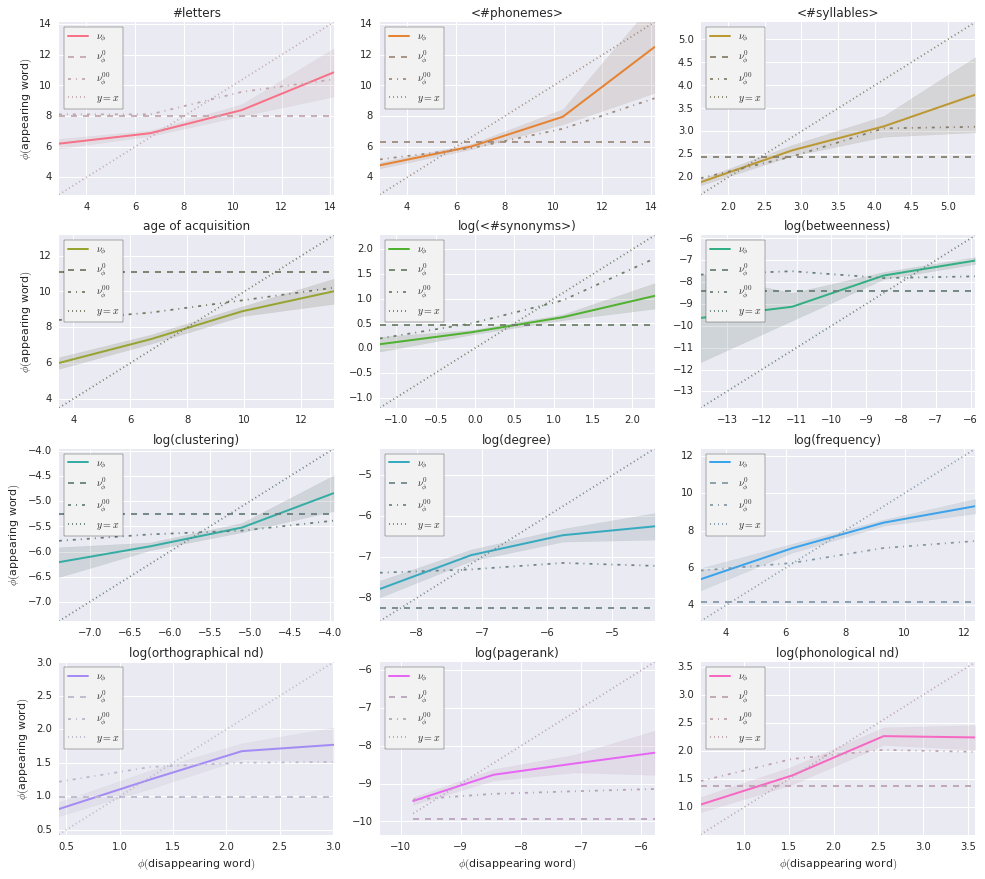

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

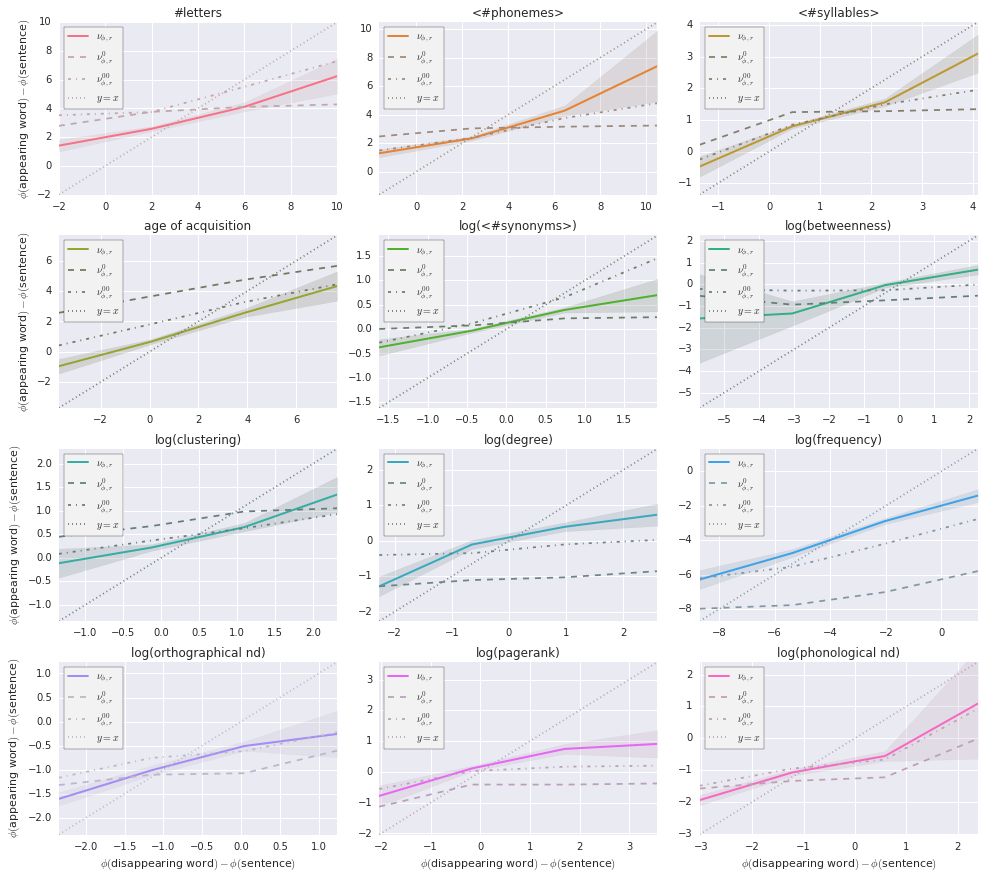

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

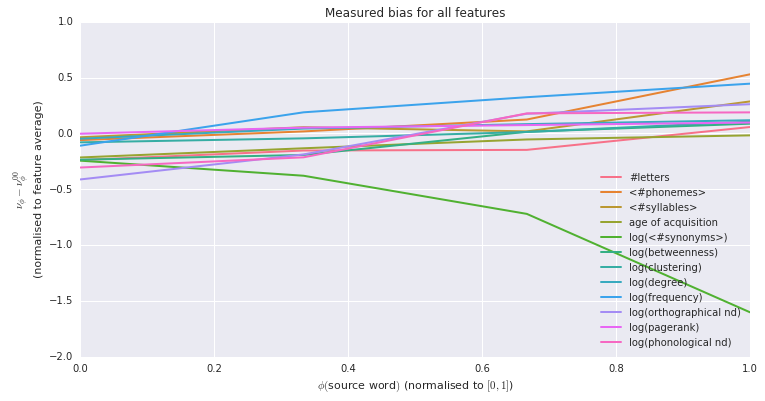

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

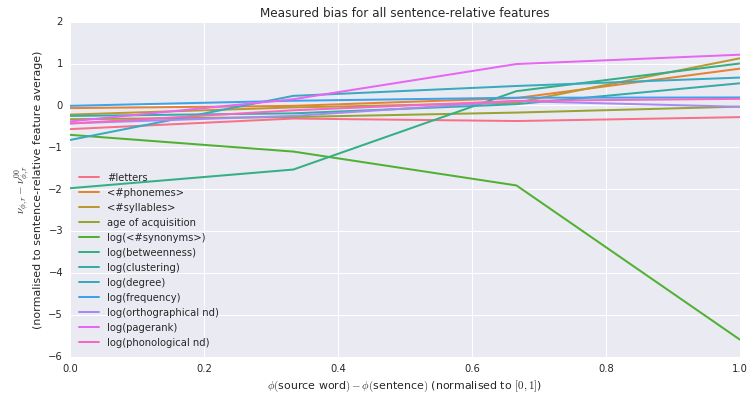

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

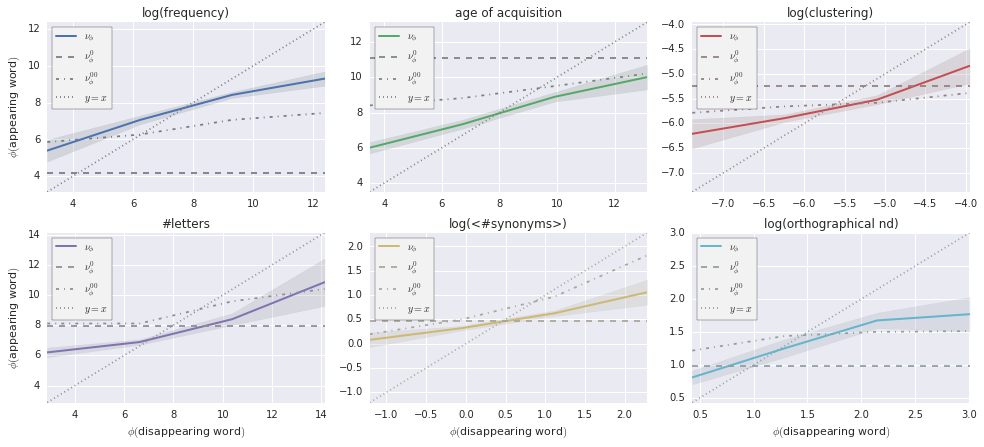

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

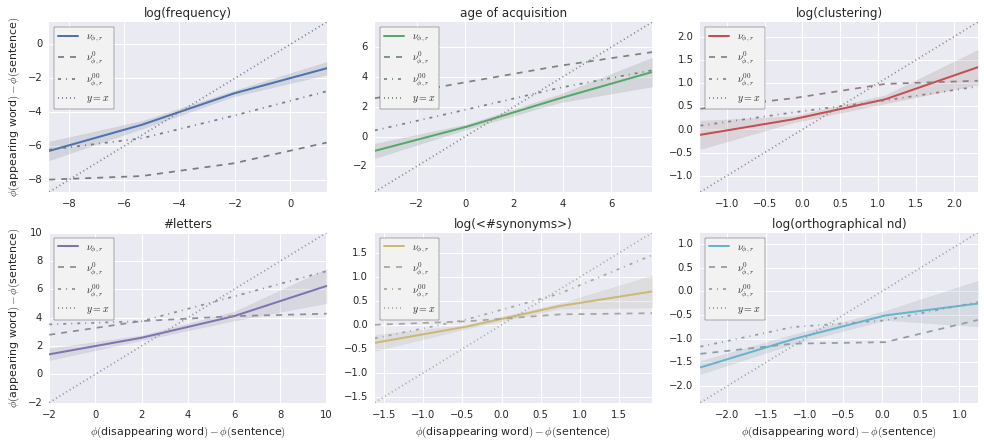

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

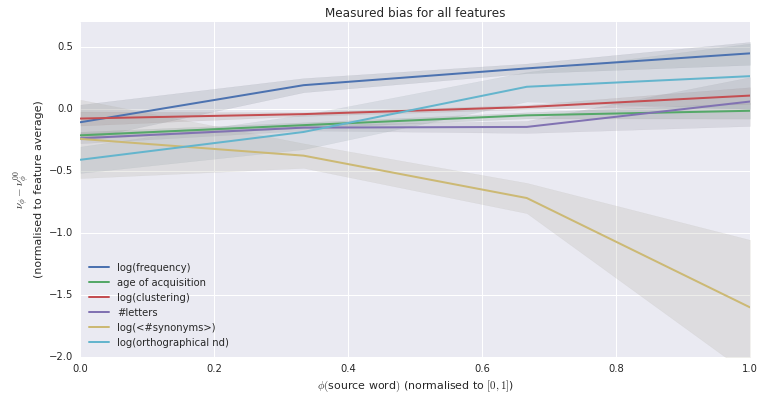

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

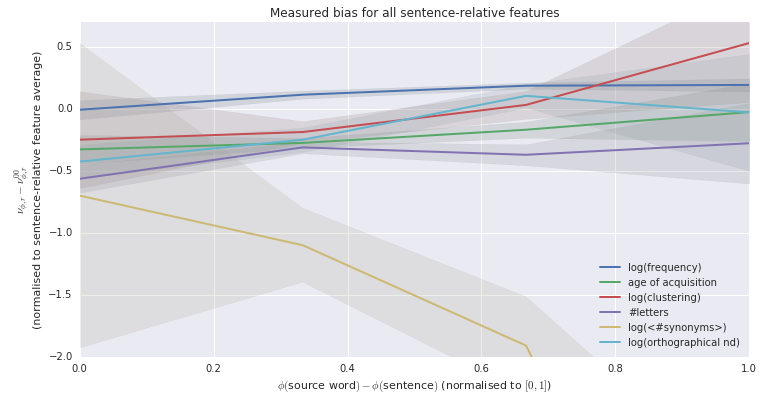

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


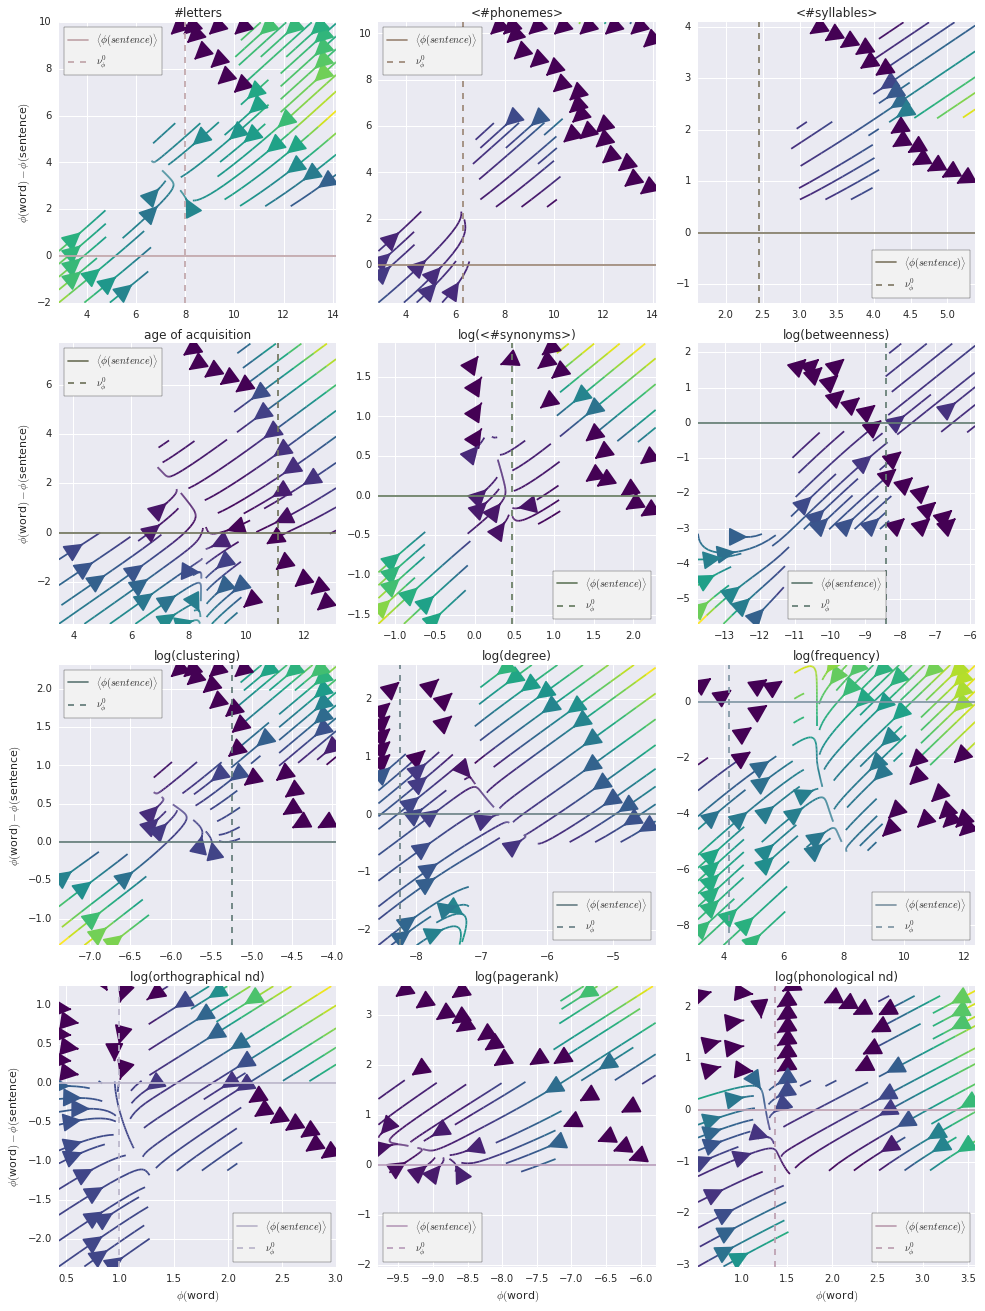

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


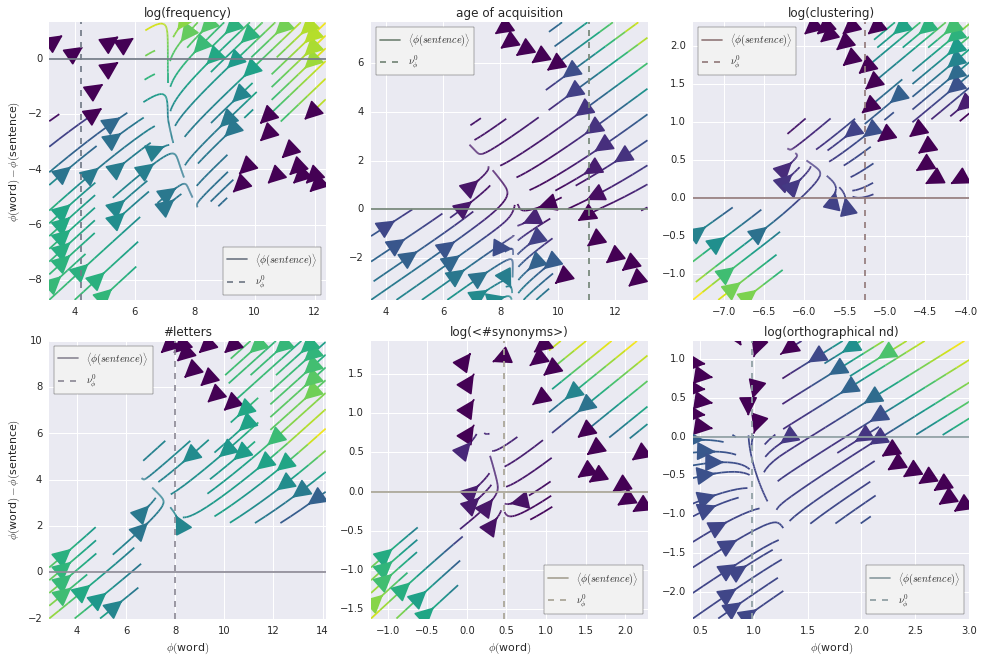

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.50944471  0.19347168  0.08014321  0.07702992  0.03180175  0.02919043
  0.02300569  0.01887973  0.01383057  0.01077125]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.535581,0.250771,-0.080544,0.232838,0.205082,-0.427172,0.187705,0.255946,-0.401847,0.271965,-0.169730,0.005970
Component-1,0.348801,-0.402161,0.134383,-0.294084,-0.210908,-0.458319,0.167273,-0.279581,-0.434811,0.206765,-0.138545,0.019218
Component-2,-0.142343,0.229207,0.006172,0.118005,-0.947297,0.038731,-0.024253,0.103441,-0.038166,0.032258,-0.024028,0.002256


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 37155) |          | Elapsed Time: 0:00:40 ETA:  17 days, 10:09:45

  0% (  112 of 37155) |                    | Elapsed Time: 0:00:41 ETA:  0:04:54

  0% (  231 of 37155) |                    | Elapsed Time: 0:00:42 ETA:  0:04:42

  0% (  347 of 37155) |                    | Elapsed Time: 0:00:43 ETA:  0:04:40

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:44 ETA:  0:04:36

  1% (  598 of 37155) |                    | Elapsed Time: 0:00:45 ETA:  0:04:26

  1% (  731 of 37155) |                    | Elapsed Time: 0:00:46 ETA:  0:04:19

  2% (  864 of 37155) |                    | Elapsed Time: 0:00:47 ETA:  0:04:14

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:48 ETA:  0:04:12

  2% ( 1068 of 37155) |                    | Elapsed Time: 0:00:49 ETA:  0:04:07

  3% ( 1228 of 37155) |                    | Elapsed Time: 0:00:50 ETA:  0:03:53

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:51 ETA:  0:03:36

  3% ( 1476 of 37155) |                    | Elapsed Time: 0:00:52 ETA:  0:03:45

  4% ( 1545 of 37155) |                    | Elapsed Time: 0:00:53 ETA:  0:04:03

  4% ( 1615 of 37155) |                    | Elapsed Time: 0:00:54 ETA:  0:04:23

  4% ( 1686 of 37155) |                    | Elapsed Time: 0:00:55 ETA:  0:04:46

  4% ( 1761 of 37155) |                    | Elapsed Time: 0:00:56 ETA:  0:05:03

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:00:57 ETA:  0:05:17

  5% ( 1982 of 37155) |#                   | Elapsed Time: 0:00:58 ETA:  0:05:34

  5% ( 2109 of 37155) |#                   | Elapsed Time: 0:00:59 ETA:  0:05:53

  6% ( 2246 of 37155) |#                   | Elapsed Time: 0:01:00 ETA:  0:05:30

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:01:00 ETA:  0:05:08

  6% ( 2490 of 37155) |#                   | Elapsed Time: 0:01:01 ETA:  0:04:28

  7% ( 2659 of 37155) |#                   | Elapsed Time: 0:01:02 ETA:  0:03:56

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:01:03 ETA:  0:03:31

  7% ( 2954 of 37155) |#                   | Elapsed Time: 0:01:04 ETA:  0:03:09

  8% ( 3095 of 37155) |#                   | Elapsed Time: 0:01:05 ETA:  0:03:02

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:01:06 ETA:  0:02:51

  9% ( 3386 of 37155) |#                   | Elapsed Time: 0:01:07 ETA:  0:02:50

  9% ( 3522 of 37155) |#                   | Elapsed Time: 0:01:08 ETA:  0:02:54

  9% ( 3645 of 37155) |#                   | Elapsed Time: 0:01:09 ETA:  0:03:03

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:01:09 ETA:  0:03:12

 10% ( 3876 of 37155) |##                  | Elapsed Time: 0:01:10 ETA:  0:03:12

 10% ( 3977 of 37155) |##                  | Elapsed Time: 0:01:11 ETA:  0:03:28

 11% ( 4104 of 37155) |##                  | Elapsed Time: 0:01:12 ETA:  0:03:31

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:01:13 ETA:  0:03:32

 11% ( 4325 of 37155) |##                  | Elapsed Time: 0:01:14 ETA:  0:03:27

 11% ( 4433 of 37155) |##                  | Elapsed Time: 0:01:15 ETA:  0:03:33

 12% ( 4543 of 37155) |##                  | Elapsed Time: 0:01:16 ETA:  0:03:40

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:01:17 ETA:  0:03:43

 12% ( 4754 of 37155) |##                  | Elapsed Time: 0:01:18 ETA:  0:03:45

 13% ( 4869 of 37155) |##                  | Elapsed Time: 0:01:19 ETA:  0:03:57

 13% ( 4980 of 37155) |##                  | Elapsed Time: 0:01:20 ETA:  0:03:53

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:01:21 ETA:  0:04:03

 14% ( 5219 of 37155) |##                  | Elapsed Time: 0:01:22 ETA:  0:04:15

 14% ( 5330 of 37155) |##                  | Elapsed Time: 0:01:23 ETA:  0:04:13

 14% ( 5440 of 37155) |##                  | Elapsed Time: 0:01:24 ETA:  0:04:12

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:01:25 ETA:  0:04:09

 15% ( 5684 of 37155) |###                 | Elapsed Time: 0:01:26 ETA:  0:04:09

 15% ( 5793 of 37155) |###                 | Elapsed Time: 0:01:27 ETA:  0:04:09

 15% ( 5903 of 37155) |###                 | Elapsed Time: 0:01:28 ETA:  0:04:09

 16% ( 6013 of 37155) |###                 | Elapsed Time: 0:01:29 ETA:  0:04:09

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:01:30 ETA:  0:04:08

 16% ( 6147 of 37155) |###                 | Elapsed Time: 0:01:31 ETA:  0:04:08

 16% ( 6280 of 37155) |###                 | Elapsed Time: 0:01:32 ETA:  0:03:57

 17% ( 6419 of 37155) |###                 | Elapsed Time: 0:01:33 ETA:  0:03:46

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:01:33 ETA:  0:03:43

 17% ( 6618 of 37155) |###                 | Elapsed Time: 0:01:34 ETA:  0:03:40

 18% ( 6736 of 37155) |###                 | Elapsed Time: 0:01:35 ETA:  0:03:36

 18% ( 6848 of 37155) |###                 | Elapsed Time: 0:01:36 ETA:  0:03:34

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:01:37 ETA:  0:03:31

 19% ( 7089 of 37155) |###                 | Elapsed Time: 0:01:38 ETA:  0:03:26

 19% ( 7217 of 37155) |###                 | Elapsed Time: 0:01:39 ETA:  0:03:27

 19% ( 7326 of 37155) |###                 | Elapsed Time: 0:01:40 ETA:  0:03:36

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:01:41 ETA:  0:03:35

 20% ( 7564 of 37155) |####                | Elapsed Time: 0:01:42 ETA:  0:03:28

 20% ( 7689 of 37155) |####                | Elapsed Time: 0:01:43 ETA:  0:03:24

 21% ( 7820 of 37155) |####                | Elapsed Time: 0:01:44 ETA:  0:03:17

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:01:45 ETA:  0:03:11

 21% ( 8025 of 37155) |####                | Elapsed Time: 0:01:46 ETA:  0:03:09

 21% ( 8153 of 37155) |####                | Elapsed Time: 0:01:47 ETA:  0:03:07

 22% ( 8288 of 37155) |####                | Elapsed Time: 0:01:48 ETA:  0:03:04

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:01:48 ETA:  0:02:59

 22% ( 8485 of 37155) |####                | Elapsed Time: 0:01:49 ETA:  0:02:58

 23% ( 8589 of 37155) |####                | Elapsed Time: 0:01:50 ETA:  0:03:05

 23% ( 8696 of 37155) |####                | Elapsed Time: 0:01:51 ETA:  0:03:10

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:01:52 ETA:  0:03:12

 24% ( 8954 of 37155) |####                | Elapsed Time: 0:01:53 ETA:  0:03:11

 24% ( 9105 of 37155) |####                | Elapsed Time: 0:01:54 ETA:  0:03:02

 24% ( 9254 of 37155) |####                | Elapsed Time: 0:01:55 ETA:  0:02:57

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:01:56 ETA:  0:02:55

 25% ( 9453 of 37155) |#####               | Elapsed Time: 0:01:57 ETA:  0:02:42

 25% ( 9582 of 37155) |#####               | Elapsed Time: 0:01:58 ETA:  0:02:34

 26% ( 9683 of 37155) |#####               | Elapsed Time: 0:01:59 ETA:  0:02:34

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:01:59 ETA:  0:02:38

 26% ( 9855 of 37155) |#####               | Elapsed Time: 0:02:00 ETA:  0:02:46

 26% (10000 of 37155) |#####               | Elapsed Time: 0:02:01 ETA:  0:02:41

 27% (10148 of 37155) |#####               | Elapsed Time: 0:02:02 ETA:  0:02:41

 27% (10218 of 37155) |#####               | Elapsed Time: 0:02:03 ETA:  0:02:43

 27% (10364 of 37155) |#####               | Elapsed Time: 0:02:04 ETA:  0:02:39

 28% (10491 of 37155) |#####               | Elapsed Time: 0:02:05 ETA:  0:02:48

 28% (10600 of 37155) |#####               | Elapsed Time: 0:02:06 ETA:  0:02:53

 28% (10683 of 37155) |#####               | Elapsed Time: 0:02:06 ETA:  0:02:41

 28% (10701 of 37155) |#####               | Elapsed Time: 0:02:11 ETA:  0:05:16

 29% (10861 of 37155) |#####               | Elapsed Time: 0:02:12 ETA:  0:04:49

 29% (10979 of 37155) |#####               | Elapsed Time: 0:02:13 ETA:  0:05:00

 30% (11147 of 37155) |######              | Elapsed Time: 0:02:14 ETA:  0:05:07

 30% (11286 of 37155) |######              | Elapsed Time: 0:02:15 ETA:  0:05:09

 30% (11434 of 37155) |######              | Elapsed Time: 0:02:16 ETA:  0:04:59

 31% (11611 of 37155) |######              | Elapsed Time: 0:02:17 ETA:  0:04:45

 31% (11779 of 37155) |######              | Elapsed Time: 0:02:18 ETA:  0:01:50

 32% (11947 of 37155) |######              | Elapsed Time: 0:02:19 ETA:  0:01:47

 32% (12076 of 37155) |######              | Elapsed Time: 0:02:20 ETA:  0:01:36

 32% (12199 of 37155) |######              | Elapsed Time: 0:02:21 ETA:  0:01:40

 33% (12326 of 37155) |######              | Elapsed Time: 0:02:22 ETA:  0:01:46

 33% (12466 of 37155) |######              | Elapsed Time: 0:02:23 ETA:  0:01:44

 33% (12540 of 37155) |######              | Elapsed Time: 0:02:23 ETA:  0:01:43

 34% (12704 of 37155) |######              | Elapsed Time: 0:02:24 ETA:  0:01:42

 34% (12879 of 37155) |######              | Elapsed Time: 0:02:25 ETA:  0:01:37

 35% (13005 of 37155) |#######             | Elapsed Time: 0:02:26 ETA:  0:01:36

 35% (13127 of 37155) |#######             | Elapsed Time: 0:02:27 ETA:  0:01:45

 35% (13219 of 37155) |#######             | Elapsed Time: 0:02:28 ETA:  0:02:00

 35% (13333 of 37155) |#######             | Elapsed Time: 0:02:29 ETA:  0:02:01

 36% (13434 of 37155) |#######             | Elapsed Time: 0:02:30 ETA:  0:02:06

 36% (13469 of 37155) |#######             | Elapsed Time: 0:02:30 ETA:  0:02:07

 36% (13600 of 37155) |#######             | Elapsed Time: 0:02:31 ETA:  0:02:09

 36% (13744 of 37155) |#######             | Elapsed Time: 0:02:32 ETA:  0:02:13

 37% (13859 of 37155) |#######             | Elapsed Time: 0:02:33 ETA:  0:02:30

 37% (13934 of 37155) |#######             | Elapsed Time: 0:02:34 ETA:  0:02:40

 37% (14099 of 37155) |#######             | Elapsed Time: 0:02:35 ETA:  0:02:24

 38% (14229 of 37155) |#######             | Elapsed Time: 0:02:36 ETA:  0:02:12

 38% (14292 of 37155) |#######             | Elapsed Time: 0:02:37 ETA:  0:02:27

 38% (14398 of 37155) |#######             | Elapsed Time: 0:02:38 ETA:  0:02:15

 39% (14521 of 37155) |#######             | Elapsed Time: 0:02:39 ETA:  0:02:16

 39% (14632 of 37155) |#######             | Elapsed Time: 0:02:40 ETA:  0:02:20

 39% (14775 of 37155) |#######             | Elapsed Time: 0:02:41 ETA:  0:02:20

 40% (14862 of 37155) |########            | Elapsed Time: 0:02:41 ETA:  0:02:17

 40% (15011 of 37155) |########            | Elapsed Time: 0:02:42 ETA:  0:02:10

 40% (15148 of 37155) |########            | Elapsed Time: 0:02:43 ETA:  0:02:17

 41% (15267 of 37155) |########            | Elapsed Time: 0:02:44 ETA:  0:02:19

 41% (15327 of 37155) |########            | Elapsed Time: 0:02:45 ETA:  0:02:01

 41% (15445 of 37155) |########            | Elapsed Time: 0:02:46 ETA:  0:02:06

 41% (15578 of 37155) |########            | Elapsed Time: 0:02:47 ETA:  0:02:02

 42% (15735 of 37155) |########            | Elapsed Time: 0:02:48 ETA:  0:01:49

 42% (15791 of 37155) |########            | Elapsed Time: 0:02:48 ETA:  0:01:50

 42% (15950 of 37155) |########            | Elapsed Time: 0:02:49 ETA:  0:01:40

 43% (16068 of 37155) |########            | Elapsed Time: 0:02:50 ETA:  0:01:46

 43% (16189 of 37155) |########            | Elapsed Time: 0:02:51 ETA:  0:01:50

 43% (16256 of 37155) |########            | Elapsed Time: 0:02:52 ETA:  0:01:44

 44% (16424 of 37155) |########            | Elapsed Time: 0:02:53 ETA:  0:01:32

 44% (16576 of 37155) |########            | Elapsed Time: 0:02:54 ETA:  0:01:24

 45% (16720 of 37155) |#########           | Elapsed Time: 0:02:55 ETA:  0:01:27

 45% (16872 of 37155) |#########           | Elapsed Time: 0:02:56 ETA:  0:01:24

 45% (17006 of 37155) |#########           | Elapsed Time: 0:02:57 ETA:  0:01:29

 46% (17138 of 37155) |#########           | Elapsed Time: 0:02:58 ETA:  0:01:25

 46% (17185 of 37155) |#########           | Elapsed Time: 0:02:58 ETA:  0:01:18

 46% (17338 of 37155) |#########           | Elapsed Time: 0:02:59 ETA:  0:01:15

 47% (17487 of 37155) |#########           | Elapsed Time: 0:03:00 ETA:  0:01:19

 47% (17649 of 37155) |#########           | Elapsed Time: 0:03:01 ETA:  0:01:13

 47% (17763 of 37155) |#########           | Elapsed Time: 0:03:02 ETA:  0:01:20

 48% (17896 of 37155) |#########           | Elapsed Time: 0:03:03 ETA:  0:01:23

 48% (18034 of 37155) |#########           | Elapsed Time: 0:03:04 ETA:  0:01:21

 48% (18114 of 37155) |#########           | Elapsed Time: 0:03:05 ETA:  0:01:19

 49% (18246 of 37155) |#########           | Elapsed Time: 0:03:06 ETA:  0:01:21

 49% (18378 of 37155) |#########           | Elapsed Time: 0:03:07 ETA:  0:01:26

 49% (18517 of 37155) |#########           | Elapsed Time: 0:03:08 ETA:  0:01:27

 50% (18578 of 37155) |##########          | Elapsed Time: 0:03:08 ETA:  0:01:37

 50% (18714 of 37155) |##########          | Elapsed Time: 0:03:09 ETA:  0:01:35

 50% (18846 of 37155) |##########          | Elapsed Time: 0:03:10 ETA:  0:01:29

 51% (18988 of 37155) |##########          | Elapsed Time: 0:03:11 ETA:  0:01:26

 51% (19042 of 37155) |##########          | Elapsed Time: 0:03:12 ETA:  0:01:28

 51% (19172 of 37155) |##########          | Elapsed Time: 0:03:13 ETA:  0:01:29

 51% (19311 of 37155) |##########          | Elapsed Time: 0:03:14 ETA:  0:01:26

 52% (19465 of 37155) |##########          | Elapsed Time: 0:03:15 ETA:  0:01:19

 52% (19507 of 37155) |##########          | Elapsed Time: 0:03:15 ETA:  0:01:19

 52% (19657 of 37155) |##########          | Elapsed Time: 0:03:16 ETA:  0:01:10

 53% (19797 of 37155) |##########          | Elapsed Time: 0:03:17 ETA:  0:01:08

 53% (19927 of 37155) |##########          | Elapsed Time: 0:03:18 ETA:  0:01:07

 53% (19971 of 37155) |##########          | Elapsed Time: 0:03:19 ETA:  0:01:09

 54% (20101 of 37155) |##########          | Elapsed Time: 0:03:20 ETA:  0:01:08

 54% (20260 of 37155) |##########          | Elapsed Time: 0:03:21 ETA:  0:01:00

 55% (20436 of 37155) |###########         | Elapsed Time: 0:03:22 ETA:  0:00:56

 55% (20579 of 37155) |###########         | Elapsed Time: 0:03:23 ETA:  0:00:56

 55% (20691 of 37155) |###########         | Elapsed Time: 0:03:24 ETA:  0:01:04

 56% (20819 of 37155) |###########         | Elapsed Time: 0:03:25 ETA:  0:01:06

 56% (20900 of 37155) |###########         | Elapsed Time: 0:03:25 ETA:  0:01:02

 56% (21068 of 37155) |###########         | Elapsed Time: 0:03:26 ETA:  0:00:54

 57% (21224 of 37155) |###########         | Elapsed Time: 0:03:27 ETA:  0:00:47

 57% (21365 of 37155) |###########         | Elapsed Time: 0:03:28 ETA:  0:00:46

 57% (21493 of 37155) |###########         | Elapsed Time: 0:03:29 ETA:  0:00:52

 58% (21563 of 37155) |###########         | Elapsed Time: 0:03:30 ETA:  0:01:08

 58% (21688 of 37155) |###########         | Elapsed Time: 0:03:31 ETA:  0:01:12

 58% (21829 of 37155) |###########         | Elapsed Time: 0:03:32 ETA:  0:01:04

 59% (21970 of 37155) |###########         | Elapsed Time: 0:03:33 ETA:  0:01:03

 59% (22126 of 37155) |###########         | Elapsed Time: 0:03:34 ETA:  0:01:05

 60% (22293 of 37155) |############        | Elapsed Time: 0:03:35 ETA:  0:01:15

 60% (22449 of 37155) |############        | Elapsed Time: 0:03:36 ETA:  0:01:05

 60% (22577 of 37155) |############        | Elapsed Time: 0:03:37 ETA:  0:00:48

 61% (22722 of 37155) |############        | Elapsed Time: 0:03:38 ETA:  0:00:42

 61% (22758 of 37155) |############        | Elapsed Time: 0:03:39 ETA:  0:00:37

 61% (22898 of 37155) |############        | Elapsed Time: 0:03:40 ETA:  0:00:37

 62% (23038 of 37155) |############        | Elapsed Time: 0:03:41 ETA:  0:00:37

 62% (23186 of 37155) |############        | Elapsed Time: 0:03:42 ETA:  0:00:38

 62% (23222 of 37155) |############        | Elapsed Time: 0:03:42 ETA:  0:00:38

 62% (23391 of 37155) |############        | Elapsed Time: 0:03:43 ETA:  0:00:30

 63% (23530 of 37155) |############        | Elapsed Time: 0:03:44 ETA:  0:00:33

 63% (23687 of 37155) |############        | Elapsed Time: 0:03:45 ETA:  0:00:31

 64% (23814 of 37155) |############        | Elapsed Time: 0:03:46 ETA:  0:00:35

 64% (23924 of 37155) |############        | Elapsed Time: 0:03:47 ETA:  0:00:42

 64% (24073 of 37155) |############        | Elapsed Time: 0:03:48 ETA:  0:00:38

 65% (24151 of 37155) |#############       | Elapsed Time: 0:03:49 ETA:  0:00:36

 65% (24276 of 37155) |#############       | Elapsed Time: 0:03:50 ETA:  0:00:39

 65% (24424 of 37155) |#############       | Elapsed Time: 0:03:51 ETA:  0:00:44

 66% (24583 of 37155) |#############       | Elapsed Time: 0:03:52 ETA:  0:00:37

 66% (24616 of 37155) |#############       | Elapsed Time: 0:03:52 ETA:  0:00:34

 66% (24769 of 37155) |#############       | Elapsed Time: 0:03:53 ETA:  0:00:30

 67% (24916 of 37155) |#############       | Elapsed Time: 0:03:54 ETA:  0:00:25

 67% (25080 of 37155) |#############       | Elapsed Time: 0:03:55 ETA:  0:00:16

 67% (25244 of 37155) |#############       | Elapsed Time: 0:03:56 ETA:  0:00:14

 68% (25383 of 37155) |#############       | Elapsed Time: 0:03:57 ETA:  0:00:10

 68% (25504 of 37155) |#############       | Elapsed Time: 0:03:58 ETA:  0:00:15

 68% (25545 of 37155) |#############       | Elapsed Time: 0:03:58 ETA:  0:00:24

 69% (25672 of 37155) |#############       | Elapsed Time: 0:03:59 ETA:  0:00:27

 69% (25789 of 37155) |#############       | Elapsed Time: 0:04:00 ETA:  0:00:36

 69% (25940 of 37155) |#############       | Elapsed Time: 0:04:01 ETA:  0:00:33

 70% (26009 of 37155) |##############      | Elapsed Time: 0:04:02 ETA:  0:00:34

 70% (26121 of 37155) |##############      | Elapsed Time: 0:04:03 ETA:  0:00:40

 70% (26236 of 37155) |##############      | Elapsed Time: 0:04:04 ETA:  0:00:53

 70% (26377 of 37155) |##############      | Elapsed Time: 0:04:05 ETA:  0:00:51

 71% (26473 of 37155) |##############      | Elapsed Time: 0:04:05 ETA:  0:00:44

 71% (26580 of 37155) |##############      | Elapsed Time: 0:04:06 ETA:  0:00:45

 71% (26706 of 37155) |##############      | Elapsed Time: 0:04:08 ETA:  0:00:44

 72% (26843 of 37155) |##############      | Elapsed Time: 0:04:09 ETA:  0:00:38

 72% (26938 of 37155) |##############      | Elapsed Time: 0:04:09 ETA:  0:00:40

 72% (27109 of 37155) |##############      | Elapsed Time: 0:04:10 ETA:  0:00:29

 73% (27265 of 37155) |##############      | Elapsed Time: 0:04:11 ETA:  0:00:17

 73% (27402 of 37155) |##############      | Elapsed Time: 0:04:12 ETA:  0:00:17

 74% (27526 of 37155) |##############      | Elapsed Time: 0:04:13 ETA:  0:00:22

 74% (27699 of 37155) |##############      | Elapsed Time: 0:04:14 ETA:  0:00:05

 74% (27792 of 37155) |##############      | Elapsed Time: 0:04:15 ETA:  0:00:11

 75% (27867 of 37155) |###############     | Elapsed Time: 0:04:16 ETA:  0:00:07

 75% (28042 of 37155) |###############     | Elapsed Time: 0:04:17 ETA:  0:00:00

 75% (28187 of 37155) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:04

 76% (28331 of 37155) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:02

 76% (28455 of 37155) |###############     | Elapsed Time: 0:04:20 ETA:  0:00:06

 76% (28576 of 37155) |###############     | Elapsed Time: 0:04:21 ETA:  0:00:05

 77% (28718 of 37155) |###############     | Elapsed Time: 0:04:22 ETA:  0:00:13

 77% (28796 of 37155) |###############     | Elapsed Time: 0:04:23 ETA:  0:00:02

 77% (28928 of 37155) |###############     | Elapsed Time: 0:04:24 ETA:  0:00:06

 78% (29083 of 37155) |###############     | Elapsed Time: 0:04:25 ETA:  0:00:10

 78% (29209 of 37155) |###############     | Elapsed Time: 0:04:26 ETA:  0:00:14

 78% (29260 of 37155) |###############     | Elapsed Time: 0:04:26 ETA:  0:00:16

 79% (29377 of 37155) |###############     | Elapsed Time: 0:04:27 ETA:  0:00:19

 79% (29504 of 37155) |###############     | Elapsed Time: 0:04:28 ETA:  0:00:17

 79% (29642 of 37155) |###############     | Elapsed Time: 0:04:29 ETA:  0:00:11

 80% (29724 of 37155) |################    | Elapsed Time: 0:04:29 ETA:  0:00:10

 80% (29871 of 37155) |################    | Elapsed Time: 0:04:30 ETA:  0:00:05

 80% (30046 of 37155) |################    | Elapsed Time: 0:04:31 ETA:  0:00:00

 81% (30189 of 37155) |################    | Elapsed Time: 0:04:33 ETA:  0:00:00

 81% (30307 of 37155) |################    | Elapsed Time: 0:04:34 ETA:  0:00:01

 81% (30438 of 37155) |################    | Elapsed Time: 0:04:35 ETA:  0:00:00

 82% (30567 of 37155) |################    | Elapsed Time: 0:04:36 ETA:  0:00:00

 82% (30653 of 37155) |################    | Elapsed Time: 0:04:36 ETA:  0:00:00

 82% (30779 of 37155) |################    | Elapsed Time: 0:04:37 ETA:  0:00:00

 83% (30928 of 37155) |################    | Elapsed Time: 0:04:38 ETA:  0:00:00

 83% (31076 of 37155) |################    | Elapsed Time: 0:04:39 ETA:  0:00:01

 83% (31118 of 37155) |################    | Elapsed Time: 0:04:40 ETA:  0:00:00

 84% (31274 of 37155) |################    | Elapsed Time: 0:04:41 ETA:  0:00:00

 84% (31432 of 37155) |################    | Elapsed Time: 0:04:42 ETA:  0:00:00

 85% (31582 of 37155) |#################   | Elapsed Time: 0:04:43 ETA:  0:00:00

 85% (31729 of 37155) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:00

 85% (31885 of 37155) |#################   | Elapsed Time: 0:04:45 ETA:  0:00:00

 86% (32047 of 37155) |#################   | Elapsed Time: 0:04:46 ETA:  0:00:00

 86% (32189 of 37155) |#################   | Elapsed Time: 0:04:47 ETA:  0:00:00

 87% (32347 of 37155) |#################   | Elapsed Time: 0:04:48 ETA:  0:00:00

 87% (32511 of 37155) |#################   | Elapsed Time: 0:04:49 ETA:  0:00:00

 87% (32672 of 37155) |#################   | Elapsed Time: 0:04:50 ETA:  0:00:00

 88% (32815 of 37155) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:00

 88% (32976 of 37155) |#################   | Elapsed Time: 0:04:52 ETA:  0:00:00

 89% (33109 of 37155) |#################   | Elapsed Time: 0:04:53 ETA:  0:00:00

 89% (33236 of 37155) |#################   | Elapsed Time: 0:04:54 ETA:  0:00:00

 89% (33373 of 37155) |#################   | Elapsed Time: 0:04:55 ETA:  0:00:00

 90% (33440 of 37155) |##################  | Elapsed Time: 0:04:55 ETA:  0:00:00

 90% (33572 of 37155) |##################  | Elapsed Time: 0:04:56 ETA:  0:00:00

 90% (33729 of 37155) |##################  | Elapsed Time: 0:04:57 ETA:  0:00:00

 91% (33870 of 37155) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:00

 91% (33904 of 37155) |##################  | Elapsed Time: 0:04:59 ETA:  0:00:00

 91% (34016 of 37155) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:00

 91% (34181 of 37155) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:00

 92% (34333 of 37155) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:00

 92% (34369 of 37155) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:00

 92% (34525 of 37155) |##################  | Elapsed Time: 0:05:03 ETA:  0:00:00

 93% (34688 of 37155) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:00

 93% (34805 of 37155) |##################  | Elapsed Time: 0:05:05 ETA:  0:00:00

 93% (34833 of 37155) |##################  | Elapsed Time: 0:05:05 ETA:  0:00:00

 94% (34978 of 37155) |##################  | Elapsed Time: 0:05:06 ETA:  0:00:00

 94% (35109 of 37155) |##################  | Elapsed Time: 0:05:07 ETA:  0:00:00

 95% (35298 of 37155) |################### | Elapsed Time: 0:05:08 ETA:  0:00:00

 95% (35453 of 37155) |################### | Elapsed Time: 0:05:09 ETA:  0:00:00

 95% (35598 of 37155) |################### | Elapsed Time: 0:05:10 ETA:  0:00:00

 96% (35762 of 37155) |################### | Elapsed Time: 0:05:11 ETA:  0:00:00

 96% (35917 of 37155) |################### | Elapsed Time: 0:05:12 ETA:  0:00:00

 97% (36053 of 37155) |################### | Elapsed Time: 0:05:13 ETA:  0:00:00

 97% (36227 of 37155) |################### | Elapsed Time: 0:05:15 ETA:  0:00:00

 97% (36370 of 37155) |################### | Elapsed Time: 0:05:16 ETA:  0:00:00

 98% (36526 of 37155) |################### | Elapsed Time: 0:05:17 ETA:  0:00:00

 98% (36691 of 37155) |################### | Elapsed Time: 0:05:18 ETA:  0:00:00

 99% (36831 of 37155) |################### | Elapsed Time: 0:05:19 ETA:  0:00:00

 99% (36979 of 37155) |################### | Elapsed Time: 0:05:20 ETA:  0:00:00

100% (37155 of 37155) |####################| Elapsed Time: 0:05:21 Time: 0:05:21


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

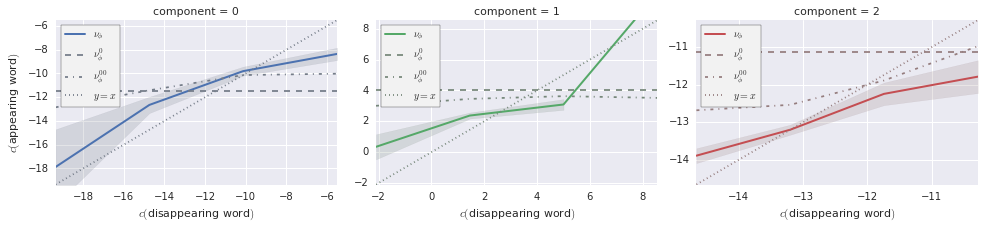

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.55922352  0.19852084  0.1439245   0.03759219  0.03530537]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.740841,-0.080510,0.279592,-0.555738,0.240102,0.002562
Component-1,0.502666,0.119547,-0.332317,-0.753693,0.233554,0.000267
Component-2,-0.431182,0.059746,-0.892867,0.111890,-0.011960,0.025265


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 37155) |            | Elapsed Time: 0:00:12 ETA:  5 days, 4:58:38

  0% (  131 of 37155) |                    | Elapsed Time: 0:00:13 ETA:  0:04:34

  0% (  260 of 37155) |                    | Elapsed Time: 0:00:14 ETA:  0:04:34

  1% (  389 of 37155) |                    | Elapsed Time: 0:00:15 ETA:  0:04:33

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:15 ETA:  0:04:30

  1% (  613 of 37155) |                    | Elapsed Time: 0:00:16 ETA:  0:04:21

  2% (  761 of 37155) |                    | Elapsed Time: 0:00:17 ETA:  0:04:15

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:18 ETA:  0:04:10

  2% ( 1082 of 37155) |                    | Elapsed Time: 0:00:19 ETA:  0:04:05

  3% ( 1248 of 37155) |                    | Elapsed Time: 0:00:20 ETA:  0:03:56

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:21 ETA:  0:03:46

  4% ( 1490 of 37155) |                    | Elapsed Time: 0:00:22 ETA:  0:03:52

  4% ( 1572 of 37155) |                    | Elapsed Time: 0:00:23 ETA:  0:04:05

  4% ( 1655 of 37155) |                    | Elapsed Time: 0:00:24 ETA:  0:04:21

  4% ( 1745 of 37155) |                    | Elapsed Time: 0:00:25 ETA:  0:04:36

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:00:26 ETA:  0:04:48

  5% ( 1993 of 37155) |#                   | Elapsed Time: 0:00:27 ETA:  0:04:53

  5% ( 2131 of 37155) |#                   | Elapsed Time: 0:00:28 ETA:  0:05:02

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:52

  6% ( 2496 of 37155) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:19

  7% ( 2679 of 37155) |#                   | Elapsed Time: 0:00:31 ETA:  0:03:49

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:00:32 ETA:  0:03:29

  7% ( 2961 of 37155) |#                   | Elapsed Time: 0:00:33 ETA:  0:03:15

  8% ( 3119 of 37155) |#                   | Elapsed Time: 0:00:34 ETA:  0:03:14

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:00:35 ETA:  0:03:09

  9% ( 3395 of 37155) |#                   | Elapsed Time: 0:00:36 ETA:  0:03:07

  9% ( 3557 of 37155) |#                   | Elapsed Time: 0:00:37 ETA:  0:03:05

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:00:38 ETA:  0:03:13

 10% ( 3883 of 37155) |##                  | Elapsed Time: 0:00:39 ETA:  0:03:16

 10% ( 3995 of 37155) |##                  | Elapsed Time: 0:00:40 ETA:  0:03:27

 11% ( 4139 of 37155) |##                  | Elapsed Time: 0:00:41 ETA:  0:03:32

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:00:41 ETA:  0:03:34

 11% ( 4332 of 37155) |##                  | Elapsed Time: 0:00:42 ETA:  0:03:34

 11% ( 4457 of 37155) |##                  | Elapsed Time: 0:00:43 ETA:  0:03:38

 12% ( 4583 of 37155) |##                  | Elapsed Time: 0:00:44 ETA:  0:03:46

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:00:45 ETA:  0:03:45

 12% ( 4769 of 37155) |##                  | Elapsed Time: 0:00:46 ETA:  0:03:48

 13% ( 4899 of 37155) |##                  | Elapsed Time: 0:00:47 ETA:  0:03:57

 13% ( 5028 of 37155) |##                  | Elapsed Time: 0:00:48 ETA:  0:03:51

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:00:48 ETA:  0:03:55

 14% ( 5235 of 37155) |##                  | Elapsed Time: 0:00:49 ETA:  0:03:57

 14% ( 5362 of 37155) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:03

 14% ( 5489 of 37155) |##                  | Elapsed Time: 0:00:52 ETA:  0:04:01

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:00:52 ETA:  0:04:00

 15% ( 5698 of 37155) |###                 | Elapsed Time: 0:00:53 ETA:  0:04:00

 15% ( 5823 of 37155) |###                 | Elapsed Time: 0:00:54 ETA:  0:03:59

 16% ( 5949 of 37155) |###                 | Elapsed Time: 0:00:55 ETA:  0:03:59

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:00:56 ETA:  0:03:59

 16% ( 6163 of 37155) |###                 | Elapsed Time: 0:00:57 ETA:  0:03:58

 16% ( 6315 of 37155) |###                 | Elapsed Time: 0:00:58 ETA:  0:03:50

 17% ( 6468 of 37155) |###                 | Elapsed Time: 0:00:59 ETA:  0:03:42

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:00:59 ETA:  0:03:41

 17% ( 6630 of 37155) |###                 | Elapsed Time: 0:01:00 ETA:  0:03:40

 18% ( 6766 of 37155) |###                 | Elapsed Time: 0:01:01 ETA:  0:03:36

 18% ( 6890 of 37155) |###                 | Elapsed Time: 0:01:02 ETA:  0:03:36

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:01:03 ETA:  0:03:34

 19% ( 7104 of 37155) |###                 | Elapsed Time: 0:01:04 ETA:  0:03:31

 19% ( 7243 of 37155) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:26

 19% ( 7368 of 37155) |###                 | Elapsed Time: 0:01:06 ETA:  0:03:32

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:01:06 ETA:  0:03:36

 20% ( 7577 of 37155) |####                | Elapsed Time: 0:01:07 ETA:  0:03:31

 20% ( 7714 of 37155) |####                | Elapsed Time: 0:01:08 ETA:  0:03:27

 21% ( 7856 of 37155) |####                | Elapsed Time: 0:01:09 ETA:  0:03:25

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:01:10 ETA:  0:03:20

 21% ( 8037 of 37155) |####                | Elapsed Time: 0:01:11 ETA:  0:03:17

 22% ( 8183 of 37155) |####                | Elapsed Time: 0:01:12 ETA:  0:03:14

 22% ( 8325 of 37155) |####                | Elapsed Time: 0:01:13 ETA:  0:03:12

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:01:13 ETA:  0:03:07

 22% ( 8500 of 37155) |####                | Elapsed Time: 0:01:14 ETA:  0:03:07

 23% ( 8618 of 37155) |####                | Elapsed Time: 0:01:15 ETA:  0:03:13

 23% ( 8748 of 37155) |####                | Elapsed Time: 0:01:16 ETA:  0:03:14

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:01:16 ETA:  0:03:14

 24% ( 8967 of 37155) |####                | Elapsed Time: 0:01:17 ETA:  0:03:13

 24% ( 9128 of 37155) |####                | Elapsed Time: 0:01:18 ETA:  0:03:07

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:01:19 ETA:  0:03:04

 25% ( 9464 of 37155) |#####               | Elapsed Time: 0:01:20 ETA:  0:02:55

 25% ( 9597 of 37155) |#####               | Elapsed Time: 0:01:21 ETA:  0:02:56

 26% ( 9707 of 37155) |#####               | Elapsed Time: 0:01:22 ETA:  0:02:57

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:01:23 ETA:  0:02:57

 26% ( 9873 of 37155) |#####               | Elapsed Time: 0:01:24 ETA:  0:03:02

 27% (10034 of 37155) |#####               | Elapsed Time: 0:01:25 ETA:  0:02:56

 27% (10218 of 37155) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:57

 27% (10376 of 37155) |#####               | Elapsed Time: 0:01:27 ETA:  0:02:52

 28% (10515 of 37155) |#####               | Elapsed Time: 0:01:28 ETA:  0:03:00

 28% (10643 of 37155) |#####               | Elapsed Time: 0:01:29 ETA:  0:03:01

 28% (10683 of 37155) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:50

 29% (10861 of 37155) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:37

 29% (11000 of 37155) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:32

 30% (11147 of 37155) |######              | Elapsed Time: 0:01:32 ETA:  0:02:29

 30% (11300 of 37155) |######              | Elapsed Time: 0:01:33 ETA:  0:02:30

 30% (11464 of 37155) |######              | Elapsed Time: 0:01:34 ETA:  0:02:27

 31% (11611 of 37155) |######              | Elapsed Time: 0:01:35 ETA:  0:02:23

 31% (11787 of 37155) |######              | Elapsed Time: 0:01:36 ETA:  0:02:15

 32% (11964 of 37155) |######              | Elapsed Time: 0:01:37 ETA:  0:02:05

 32% (12076 of 37155) |######              | Elapsed Time: 0:01:38 ETA:  0:02:04

 32% (12218 of 37155) |######              | Elapsed Time: 0:01:39 ETA:  0:02:09

 33% (12359 of 37155) |######              | Elapsed Time: 0:01:40 ETA:  0:02:07

 33% (12540 of 37155) |######              | Elapsed Time: 0:01:41 ETA:  0:02:05

 34% (12716 of 37155) |######              | Elapsed Time: 0:01:42 ETA:  0:02:02

 34% (12901 of 37155) |######              | Elapsed Time: 0:01:43 ETA:  0:01:59

 35% (13005 of 37155) |#######             | Elapsed Time: 0:01:43 ETA:  0:01:59

 35% (13141 of 37155) |#######             | Elapsed Time: 0:01:44 ETA:  0:02:06

 35% (13262 of 37155) |#######             | Elapsed Time: 0:01:45 ETA:  0:02:15

 36% (13380 of 37155) |#######             | Elapsed Time: 0:01:46 ETA:  0:02:19

 36% (13469 of 37155) |#######             | Elapsed Time: 0:01:47 ETA:  0:02:19

 36% (13617 of 37155) |#######             | Elapsed Time: 0:01:48 ETA:  0:02:22

 37% (13774 of 37155) |#######             | Elapsed Time: 0:01:49 ETA:  0:02:20

 37% (13894 of 37155) |#######             | Elapsed Time: 0:01:50 ETA:  0:02:30

 37% (13934 of 37155) |#######             | Elapsed Time: 0:01:50 ETA:  0:02:39

 37% (14104 of 37155) |#######             | Elapsed Time: 0:01:51 ETA:  0:02:37

 38% (14239 of 37155) |#######             | Elapsed Time: 0:01:52 ETA:  0:02:36

 38% (14331 of 37155) |#######             | Elapsed Time: 0:01:53 ETA:  0:02:42

 38% (14398 of 37155) |#######             | Elapsed Time: 0:01:54 ETA:  0:02:33

 39% (14536 of 37155) |#######             | Elapsed Time: 0:01:55 ETA:  0:02:31

 39% (14681 of 37155) |#######             | Elapsed Time: 0:01:56 ETA:  0:02:30

 39% (14826 of 37155) |#######             | Elapsed Time: 0:01:57 ETA:  0:02:33

 40% (14862 of 37155) |########            | Elapsed Time: 0:01:57 ETA:  0:02:26

 40% (15025 of 37155) |########            | Elapsed Time: 0:01:58 ETA:  0:02:21

 40% (15172 of 37155) |########            | Elapsed Time: 0:01:59 ETA:  0:02:26

 41% (15327 of 37155) |########            | Elapsed Time: 0:02:00 ETA:  0:02:12

 41% (15458 of 37155) |########            | Elapsed Time: 0:02:01 ETA:  0:02:17

 42% (15615 of 37155) |########            | Elapsed Time: 0:02:02 ETA:  0:02:12

 42% (15791 of 37155) |########            | Elapsed Time: 0:02:03 ETA:  0:02:04

 42% (15960 of 37155) |########            | Elapsed Time: 0:02:04 ETA:  0:01:59

 43% (16089 of 37155) |########            | Elapsed Time: 0:02:05 ETA:  0:02:06

 43% (16256 of 37155) |########            | Elapsed Time: 0:02:06 ETA:  0:02:01

 44% (16435 of 37155) |########            | Elapsed Time: 0:02:07 ETA:  0:01:53

 44% (16594 of 37155) |########            | Elapsed Time: 0:02:08 ETA:  0:01:46

 45% (16720 of 37155) |#########           | Elapsed Time: 0:02:09 ETA:  0:01:46

 45% (16887 of 37155) |#########           | Elapsed Time: 0:02:10 ETA:  0:01:45

 45% (17032 of 37155) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:47

 46% (17185 of 37155) |#########           | Elapsed Time: 0:02:12 ETA:  0:01:48

 46% (17346 of 37155) |#########           | Elapsed Time: 0:02:13 ETA:  0:01:41

 47% (17508 of 37155) |#########           | Elapsed Time: 0:02:14 ETA:  0:01:37

 47% (17649 of 37155) |#########           | Elapsed Time: 0:02:15 ETA:  0:01:36

 47% (17777 of 37155) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:44

 48% (17934 of 37155) |#########           | Elapsed Time: 0:02:17 ETA:  0:01:43

 48% (18114 of 37155) |#########           | Elapsed Time: 0:02:18 ETA:  0:01:45

 49% (18265 of 37155) |#########           | Elapsed Time: 0:02:19 ETA:  0:01:43

 49% (18420 of 37155) |#########           | Elapsed Time: 0:02:20 ETA:  0:01:42

 50% (18578 of 37155) |##########          | Elapsed Time: 0:02:21 ETA:  0:01:48

 50% (18729 of 37155) |##########          | Elapsed Time: 0:02:22 ETA:  0:01:50

 50% (18877 of 37155) |##########          | Elapsed Time: 0:02:23 ETA:  0:01:44

 51% (19042 of 37155) |##########          | Elapsed Time: 0:02:24 ETA:  0:01:44

 51% (19190 of 37155) |##########          | Elapsed Time: 0:02:25 ETA:  0:01:43

 52% (19343 of 37155) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:42

 52% (19507 of 37155) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:38

 52% (19671 of 37155) |##########          | Elapsed Time: 0:02:28 ETA:  0:01:31

 53% (19827 of 37155) |##########          | Elapsed Time: 0:02:29 ETA:  0:01:30

 53% (19971 of 37155) |##########          | Elapsed Time: 0:02:30 ETA:  0:01:30

 54% (20119 of 37155) |##########          | Elapsed Time: 0:02:31 ETA:  0:01:29

 54% (20295 of 37155) |##########          | Elapsed Time: 0:02:32 ETA:  0:01:24

 55% (20436 of 37155) |###########         | Elapsed Time: 0:02:33 ETA:  0:01:21

 55% (20592 of 37155) |###########         | Elapsed Time: 0:02:34 ETA:  0:01:19

 55% (20719 of 37155) |###########         | Elapsed Time: 0:02:35 ETA:  0:01:23

 56% (20900 of 37155) |###########         | Elapsed Time: 0:02:36 ETA:  0:01:24

 56% (21077 of 37155) |###########         | Elapsed Time: 0:02:37 ETA:  0:01:19

 57% (21249 of 37155) |###########         | Elapsed Time: 0:02:38 ETA:  0:01:13

 57% (21365 of 37155) |###########         | Elapsed Time: 0:02:39 ETA:  0:01:09

 57% (21503 of 37155) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:15

 58% (21609 of 37155) |###########         | Elapsed Time: 0:02:41 ETA:  0:01:26

 58% (21755 of 37155) |###########         | Elapsed Time: 0:02:42 ETA:  0:01:27

 58% (21829 of 37155) |###########         | Elapsed Time: 0:02:42 ETA:  0:01:21

 59% (21992 of 37155) |###########         | Elapsed Time: 0:02:43 ETA:  0:01:20

 59% (22162 of 37155) |###########         | Elapsed Time: 0:02:44 ETA:  0:01:16

 60% (22293 of 37155) |############        | Elapsed Time: 0:02:45 ETA:  0:01:18

 60% (22465 of 37155) |############        | Elapsed Time: 0:02:46 ETA:  0:01:17

 60% (22614 of 37155) |############        | Elapsed Time: 0:02:47 ETA:  0:01:20

 61% (22758 of 37155) |############        | Elapsed Time: 0:02:48 ETA:  0:01:14

 61% (22912 of 37155) |############        | Elapsed Time: 0:02:49 ETA:  0:01:04

 62% (23077 of 37155) |############        | Elapsed Time: 0:02:50 ETA:  0:01:00

 62% (23222 of 37155) |############        | Elapsed Time: 0:02:51 ETA:  0:00:58

 62% (23404 of 37155) |############        | Elapsed Time: 0:02:52 ETA:  0:00:54

 63% (23552 of 37155) |############        | Elapsed Time: 0:02:53 ETA:  0:00:56

 63% (23687 of 37155) |############        | Elapsed Time: 0:02:54 ETA:  0:00:58

 64% (23832 of 37155) |############        | Elapsed Time: 0:02:55 ETA:  0:01:01

 64% (23966 of 37155) |############        | Elapsed Time: 0:02:56 ETA:  0:01:03

 65% (24151 of 37155) |#############       | Elapsed Time: 0:02:57 ETA:  0:00:59

 65% (24294 of 37155) |#############       | Elapsed Time: 0:02:58 ETA:  0:01:02

 65% (24454 of 37155) |#############       | Elapsed Time: 0:02:59 ETA:  0:01:01

 66% (24616 of 37155) |#############       | Elapsed Time: 0:03:00 ETA:  0:01:01

 66% (24784 of 37155) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:56

 67% (24951 of 37155) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:52

 67% (25080 of 37155) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:49

 67% (25257 of 37155) |#############       | Elapsed Time: 0:03:04 ETA:  0:00:40

 68% (25412 of 37155) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:43

 68% (25545 of 37155) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:44

 69% (25696 of 37155) |#############       | Elapsed Time: 0:03:07 ETA:  0:00:45

 69% (25832 of 37155) |#############       | Elapsed Time: 0:03:08 ETA:  0:00:52

 70% (26009 of 37155) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:54

 70% (26131 of 37155) |##############      | Elapsed Time: 0:03:10 ETA:  0:01:01

 70% (26270 of 37155) |##############      | Elapsed Time: 0:03:11 ETA:  0:01:09

 71% (26433 of 37155) |##############      | Elapsed Time: 0:03:12 ETA:  0:01:06

 71% (26473 of 37155) |##############      | Elapsed Time: 0:03:12 ETA:  0:01:00

 71% (26603 of 37155) |##############      | Elapsed Time: 0:03:13 ETA:  0:01:03

 71% (26739 of 37155) |##############      | Elapsed Time: 0:03:14 ETA:  0:01:06

 72% (26898 of 37155) |##############      | Elapsed Time: 0:03:15 ETA:  0:01:00

 72% (26938 of 37155) |##############      | Elapsed Time: 0:03:15 ETA:  0:01:03

 72% (27121 of 37155) |##############      | Elapsed Time: 0:03:16 ETA:  0:00:54

 73% (27282 of 37155) |##############      | Elapsed Time: 0:03:17 ETA:  0:00:44

 73% (27402 of 37155) |##############      | Elapsed Time: 0:03:18 ETA:  0:00:45

 74% (27537 of 37155) |##############      | Elapsed Time: 0:03:19 ETA:  0:00:50

 74% (27716 of 37155) |##############      | Elapsed Time: 0:03:20 ETA:  0:00:44

 75% (27867 of 37155) |###############     | Elapsed Time: 0:03:22 ETA:  0:00:39

 75% (28051 of 37155) |###############     | Elapsed Time: 0:03:23 ETA:  0:00:33

 75% (28207 of 37155) |###############     | Elapsed Time: 0:03:24 ETA:  0:00:33

 76% (28331 of 37155) |###############     | Elapsed Time: 0:03:24 ETA:  0:00:38

 76% (28467 of 37155) |###############     | Elapsed Time: 0:03:25 ETA:  0:00:43

 77% (28616 of 37155) |###############     | Elapsed Time: 0:03:26 ETA:  0:00:38

 77% (28796 of 37155) |###############     | Elapsed Time: 0:03:28 ETA:  0:00:38

 77% (28953 of 37155) |###############     | Elapsed Time: 0:03:29 ETA:  0:00:30

 78% (29103 of 37155) |###############     | Elapsed Time: 0:03:30 ETA:  0:00:31

 78% (29260 of 37155) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:34

 79% (29405 of 37155) |###############     | Elapsed Time: 0:03:32 ETA:  0:00:36

 79% (29545 of 37155) |###############     | Elapsed Time: 0:03:33 ETA:  0:00:36

 80% (29724 of 37155) |################    | Elapsed Time: 0:03:34 ETA:  0:00:29

 80% (29888 of 37155) |################    | Elapsed Time: 0:03:35 ETA:  0:00:26

 80% (30073 of 37155) |################    | Elapsed Time: 0:03:36 ETA:  0:00:19

 81% (30189 of 37155) |################    | Elapsed Time: 0:03:37 ETA:  0:00:22

 81% (30331 of 37155) |################    | Elapsed Time: 0:03:38 ETA:  0:00:23

 81% (30459 of 37155) |################    | Elapsed Time: 0:03:39 ETA:  0:00:29

 82% (30653 of 37155) |################    | Elapsed Time: 0:03:40 ETA:  0:00:20

 82% (30791 of 37155) |################    | Elapsed Time: 0:03:41 ETA:  0:00:24

 83% (30957 of 37155) |################    | Elapsed Time: 0:03:42 ETA:  0:00:21

 83% (31118 of 37155) |################    | Elapsed Time: 0:03:43 ETA:  0:00:18

 84% (31285 of 37155) |################    | Elapsed Time: 0:03:44 ETA:  0:00:21

 84% (31468 of 37155) |################    | Elapsed Time: 0:03:45 ETA:  0:00:10

 85% (31582 of 37155) |#################   | Elapsed Time: 0:03:45 ETA:  0:00:08

 85% (31745 of 37155) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:00

 85% (31914 of 37155) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:00

 86% (32047 of 37155) |#################   | Elapsed Time: 0:03:48 ETA:  0:00:00

 86% (32204 of 37155) |#################   | Elapsed Time: 0:03:49 ETA:  0:00:00

 87% (32384 of 37155) |#################   | Elapsed Time: 0:03:50 ETA:  0:00:00

 87% (32511 of 37155) |#################   | Elapsed Time: 0:03:51 ETA:  0:00:00

 87% (32684 of 37155) |#################   | Elapsed Time: 0:03:52 ETA:  0:00:00

 88% (32841 of 37155) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:00

 88% (32976 of 37155) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 89% (33120 of 37155) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 89% (33275 of 37155) |#################   | Elapsed Time: 0:03:56 ETA:  0:00:00

 90% (33440 of 37155) |##################  | Elapsed Time: 0:03:57 ETA:  0:00:00

 90% (33592 of 37155) |##################  | Elapsed Time: 0:03:58 ETA:  0:00:00

 90% (33762 of 37155) |##################  | Elapsed Time: 0:03:59 ETA:  0:00:00

 91% (33904 of 37155) |##################  | Elapsed Time: 0:04:00 ETA:  0:00:00

 91% (34044 of 37155) |##################  | Elapsed Time: 0:04:01 ETA:  0:00:00

 92% (34218 of 37155) |##################  | Elapsed Time: 0:04:02 ETA:  0:00:00

 92% (34369 of 37155) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 92% (34542 of 37155) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 93% (34709 of 37155) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 93% (34833 of 37155) |##################  | Elapsed Time: 0:04:06 ETA:  0:00:00

 94% (34994 of 37155) |##################  | Elapsed Time: 0:04:07 ETA:  0:00:00

 94% (35156 of 37155) |##################  | Elapsed Time: 0:04:08 ETA:  0:00:00

 95% (35298 of 37155) |################### | Elapsed Time: 0:04:08 ETA:  0:00:00

 95% (35464 of 37155) |################### | Elapsed Time: 0:04:09 ETA:  0:00:00

 95% (35633 of 37155) |################### | Elapsed Time: 0:04:10 ETA:  0:00:00

 96% (35762 of 37155) |################### | Elapsed Time: 0:04:11 ETA:  0:00:00

 96% (35934 of 37155) |################### | Elapsed Time: 0:04:12 ETA:  0:00:00

 97% (36087 of 37155) |################### | Elapsed Time: 0:04:13 ETA:  0:00:00

 97% (36227 of 37155) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 97% (36390 of 37155) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 98% (36561 of 37155) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

 98% (36691 of 37155) |################### | Elapsed Time: 0:04:17 ETA:  0:00:00

 99% (36851 of 37155) |################### | Elapsed Time: 0:04:18 ETA:  0:00:00

 99% (37013 of 37155) |################### | Elapsed Time: 0:04:19 ETA:  0:00:00

100% (37155 of 37155) |####################| Elapsed Time: 0:04:20 Time: 0:04:20


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

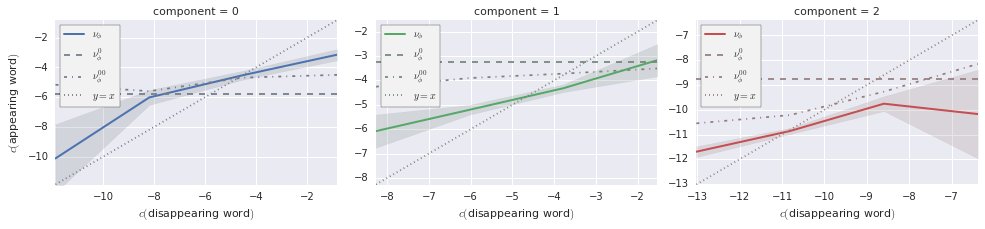

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1561 (cluster-unique) substitutions, but the PCA is in fact computed on 515 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.